# **Prediction Model for future ridership**

# Setting for our data analysis

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load our csv file into Python
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_ridership_weather.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_values(by='Date')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1792 entries, 2020-04-01 to 2025-02-25
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entries       1792 non-null   int64  
 1   Exits         1792 non-null   int64  
 2   Day_of_Week   1792 non-null   object 
 3   Year          1792 non-null   int64  
 4   Month         1792 non-null   int64  
 5   Weekday       1792 non-null   int64  
 6   Holiday       1792 non-null   int64  
 7   HolidayName   63 non-null     object 
 8   tempmax       1792 non-null   float64
 9   tempmin       1792 non-null   float64
 10  temp          1792 non-null   float64
 11  feelslikemax  1792 non-null   float64
 12  feelslikemin  1792 non-null   float64
 13  feelslike     1792 non-null   float64
 14  has_rain      1792 non-null   int64  
 15  precip        1792 non-null   float64
 16  precipprob    1792 non-null   int64  
 17  has_snow      1792 non-null   int64  
 18  precipcove

In [ ]:
# Define color palette for further plots
Red	=	'#D02239'
Orange	=	'#EA8C2D'
Blue	=	'#006CA9'
Green	=	'#009D4A'
Yellow	=	'#FBCD21'
Silver	=	'#989B96'
Purple	=	'#6F30A5'
Brown	=	'#92541F'
Pink	=	'#E436C1'

# Plot Daily Entries over time

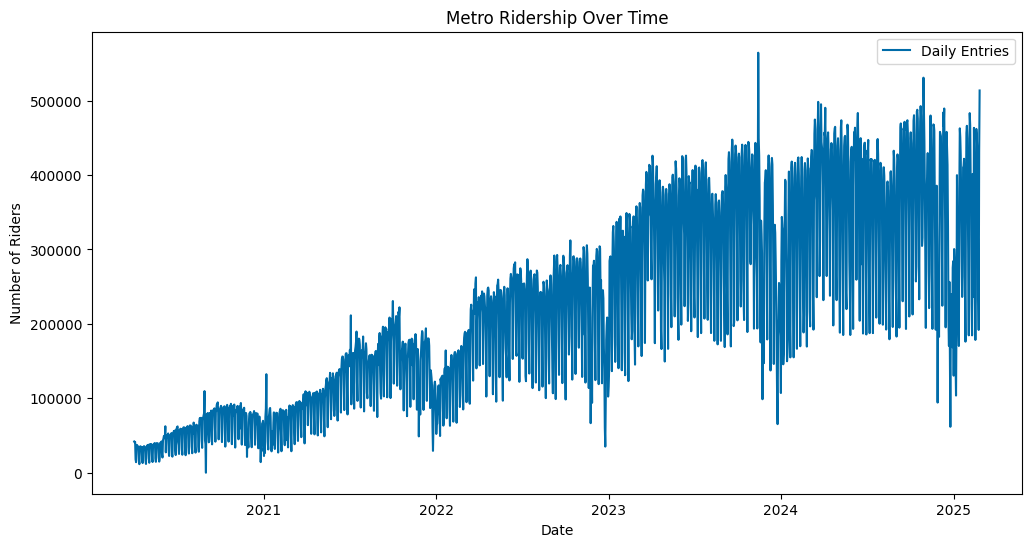

In [ ]:
# plot Daily Entries over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Entries'], label="Daily Entries", color=Blue)
plt.xlabel('Date')
plt.ylabel('Number of Riders')
plt.title('Metro Ridership Over Time')
plt.legend()
plt.show()

In [ ]:
# Create a dictionary to map day names to numerical values
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7 }

# Convert 'Day_of_Week' to numerical using the mapping
df['Day_name'] = df['Day_of_Week']
df['Day_of_Week'] = df['Day_of_Week'].map(day_mapping)

# Include a column for the Day, Month, Year, Week
df['Day'] = df.index.day
# df['Month'] = df['Date'].dt.month
# df['Year'] = df['Date'].dt.year
df['Week'] = df.index.isocalendar().week

df

Entries   Exits  Day_of_Week  Year  Month  Weekday  Holiday  \
Date                                                                      
2020-04-01    41915   40766            3  2020      4        1        0   
2020-04-02    40610   39315            4  2020      4        1        0   
2020-04-03    41436   40117            5  2020      4        1        0   
2020-04-04    17847   17053            6  2020      4        0        0   
2020-04-05    14165   13485            7  2020      4        0        0   
...             ...     ...          ...   ...    ...      ...      ...   
2025-02-21   378902  378789            5  2025      2        1        0   
2025-02-22   245046  245686            6  2025      2        0        0   
2025-02-23   191879  192449            7  2025      2        0        0   
2025-02-24   431077  430097            1  2025      2        1        0   
2025-02-25   513640  510965            2  2025      2        1        0   

           HolidayName  tempmax  tempmin  ...  has_snow  precipcover  snow  \
Date                                      ...                                
2020-04-01         NaN     55.9     42.0  ...         0         4.17   0.0   
2020-04-02         NaN     62.7     42.8  ...         0         0.00   0.0   
2020-04-03         NaN     66.7     47.8  ...         0         0.00   0.0   
2020-04-04         NaN     58.8     49.9  ...         0         0.00   0.0   
2020-04-05         NaN     68.0     46.4  ...         0         0.00   0.0   
...                ...      ...      ...  ...       ...          ...   ...   
2025-02-21         NaN     40.6     26.7  ...         0         0.00   0.0   
2025-02-22         NaN     42.9     23.8  ...         0         0.00   0.0   
2025-02-23         NaN     53.6     28.6  ...         0         0.00   0.0   
2025-02-24         NaN     56.9     36.2  ...         0         0.00   0.0   
2025-02-25         NaN     67.7     38.7  ...         0         0.00   0.0   

            snowdepth  windspeed  cloudcover  visibility   Day_name  Day  Week  
Date                                                                            
2020-04-01        0.0       16.6        76.5         9.9  Wednesday    1    14  
2020-04-02        0.0       26.2        21.5         9.9   Thursday    2    14  
2020-04-03        0.0       26.5        38.3         9.9     Friday    3    14  
2020-04-04        0.0       14.1        91.3         9.9   Saturday    4    14  
2020-04-05        0.0       10.8        61.3         9.9     Sunday    5    14  
...               ...        ...         ...         ...        ...  ...   ...  
2025-02-21        0.0       22.5        17.3         9.9     Friday   21     8  
2025-02-22        0.0       15.3        44.1         9.9   Saturday   22     8  
2025-02-23        0.0       12.5        36.3         9.9     Sunday   23     8  
2025-02-24        0.0       12.7        70.3         9.9     Monday   24     9  
2025-02-25        0.0       12.2        59.6         9.9    Tuesday   25     9  

[1792 rows x 27 columns]

# Correlation Matrix

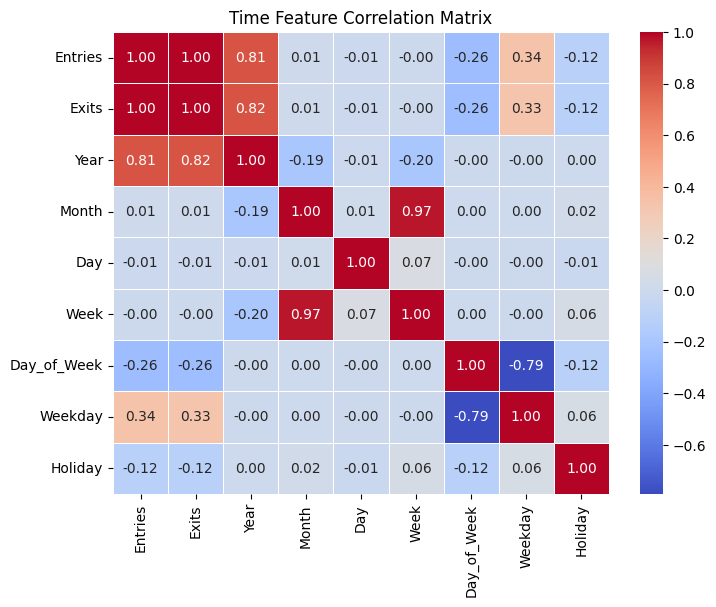

In [ ]:
# check correlation matrix
corr_matrix = df[['Entries', 'Exits','Year','Month','Day','Week','Day_of_Week','Weekday','Holiday']].corr()
# plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.5, fmt=".2f")
plt.title("Time Feature Correlation Matrix")
plt.show()

# Feature Engineering and Selection
We create other features that may help our prediction.
- Lag Features: Previous day’s ridership
- Rolling Features: 7-day average to capture trends
- Weekend Indicator
- Interaction Features: Combining Holiday & Weekday

In [ ]:
# Lag feature (Previous day's ridership)
df['Lag_1'] = df['Entries'].shift(1)
df['Lag_1'].fillna(df['Entries'], inplace=True)

# Rolling mean (7-day window)
df['Rolling_7'] = df['Entries'].rolling(window=7, min_periods=1).mean().round(2)

# Weekend Indicator (1 if Saturday/Sunday, else 0)
df['Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x in [6, 7] else 0)

# Interaction feature: Holiday & Weekend combined
df['Holiday_Weekend'] = df['Holiday'] * df['Weekend']

df


<ipython-input-206-6c8064b640c0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lag_1'].fillna(df['Entries'], inplace=True)


Entries   Exits  Day_of_Week  Year  Month  Weekday  Holiday  \
Date                                                                      
2020-04-01    41915   40766            3  2020      4        1        0   
2020-04-02    40610   39315            4  2020      4        1        0   
2020-04-03    41436   40117            5  2020      4        1        0   
2020-04-04    17847   17053            6  2020      4        0        0   
2020-04-05    14165   13485            7  2020      4        0        0   
...             ...     ...          ...   ...    ...      ...      ...   
2025-02-21   378902  378789            5  2025      2        1        0   
2025-02-22   245046  245686            6  2025      2        0        0   
2025-02-23   191879  192449            7  2025      2        0        0   
2025-02-24   431077  430097            1  2025      2        1        0   
2025-02-25   513640  510965            2  2025      2        1        0   

           HolidayName  tempmax  tempmin  ...  windspeed  cloudcover  \
Date                                      ...                          
2020-04-01         NaN     55.9     42.0  ...       16.6        76.5   
2020-04-02         NaN     62.7     42.8  ...       26.2        21.5   
2020-04-03         NaN     66.7     47.8  ...       26.5        38.3   
2020-04-04         NaN     58.8     49.9  ...       14.1        91.3   
2020-04-05         NaN     68.0     46.4  ...       10.8        61.3   
...                ...      ...      ...  ...        ...         ...   
2025-02-21         NaN     40.6     26.7  ...       22.5        17.3   
2025-02-22         NaN     42.9     23.8  ...       15.3        44.1   
2025-02-23         NaN     53.6     28.6  ...       12.5        36.3   
2025-02-24         NaN     56.9     36.2  ...       12.7        70.3   
2025-02-25         NaN     67.7     38.7  ...       12.2        59.6   

            visibility   Day_name  Day  Week     Lag_1  Rolling_7  Weekend  \
Date                                                                         
2020-04-01         9.9  Wednesday    1    14   41915.0   41915.00        0   
2020-04-02         9.9   Thursday    2    14   41915.0   41262.50        0   
2020-04-03         9.9     Friday    3    14   40610.0   41320.33        0   
2020-04-04         9.9   Saturday    4    14   41436.0   35452.00        1   
2020-04-05         9.9     Sunday    5    14   17847.0   31194.60        1   
...                ...        ...  ...   ...       ...        ...      ...   
2025-02-21         9.9     Friday   21     8  432666.0  338426.71        0   
2025-02-22         9.9   Saturday   22     8  378902.0  340599.71        1   
2025-02-23         9.9     Sunday   23     8  245046.0  342521.43        1   
2025-02-24         9.9     Monday   24     9  191879.0  370560.57        0   
2025-02-25         9.9    Tuesday   25     9  431077.0  377934.86        0   

            Holiday_Weekend  
Date                         
2020-04-01                0  
2020-04-02                0  
2020-04-03                0  
2020-04-04                0  
2020-04-05                0  
...                     ...  
2025-02-21                0  
2025-02-22                0  
2025-02-23                0  
2025-02-24                0  
2025-02-25                0  

[1792 rows x 31 columns]

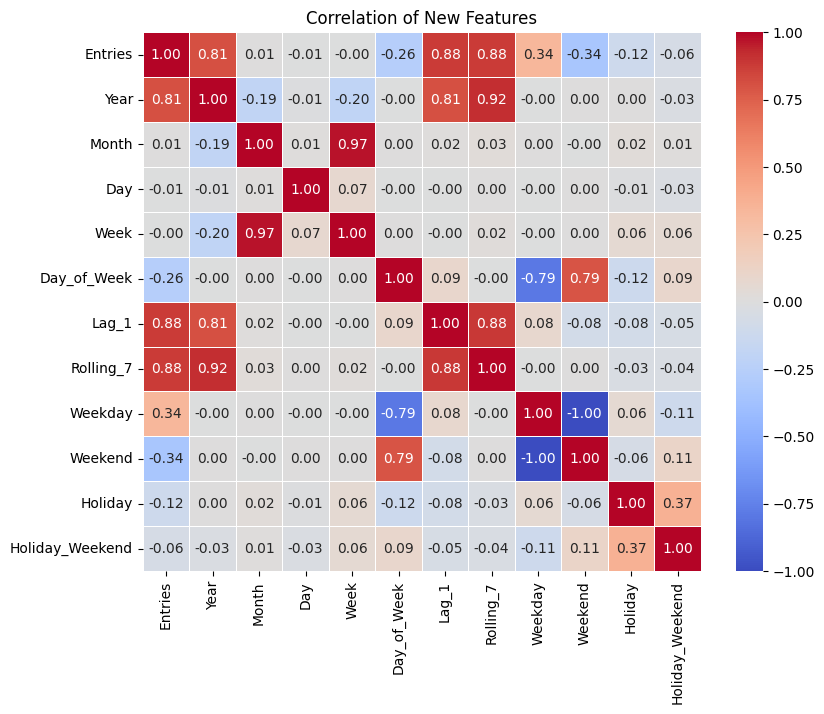

In [ ]:
# Check correlation of all features
corr_matrix = df[['Entries','Year','Month','Day','Week','Day_of_Week','Lag_1','Rolling_7','Weekday','Weekend','Holiday','Holiday_Weekend']].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation of New Features")
plt.show()

### Entries by Day of Week

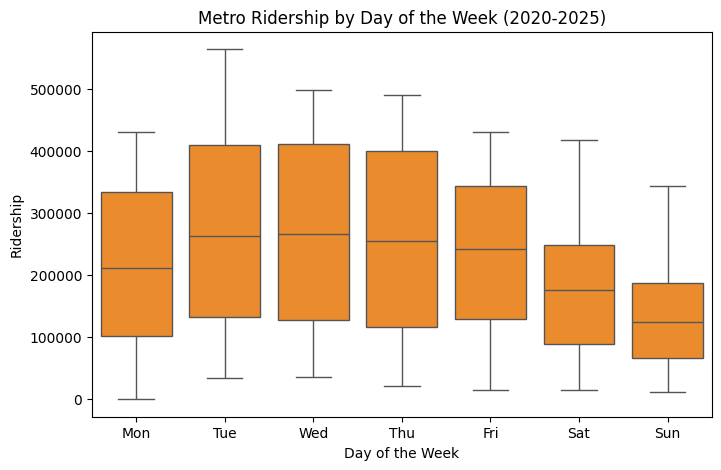

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Day_of_Week', y='Entries', data=df, color=Orange, saturation=1)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Day of the Week")
plt.ylabel("Ridership")
plt.title("Metro Ridership by Day of the Week (2020-2025)")
plt.show()


###  Entries on Holidays vs. Non-Holidays


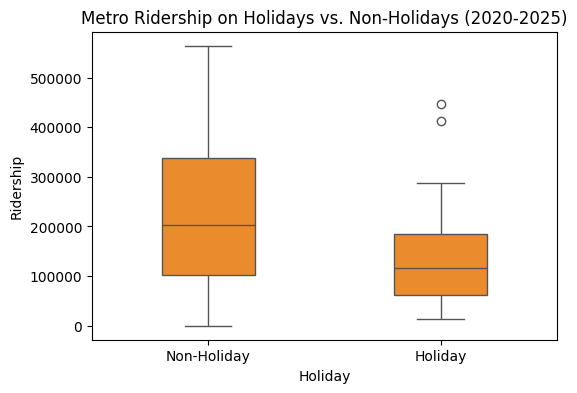

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Holiday', y='Entries', data=df, width=0.4 , color=Orange, saturation=1)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.xlabel("Holiday")
plt.ylabel("Ridership")
plt.title("Metro Ridership on Holidays vs. Non-Holidays (2020-2025)")
plt.show()


# Prediction Model I - Daily

### Step 1: Split Data into Train and Test Data


In [ ]:
# Select features for prediction
features = ['Year','Month','Day','Week','Day_of_Week','Weekend','Holiday','Holiday_Weekend','Lag_1','Rolling_7',]
target = 'Entries'

In [ ]:
# Create feature and target DataFrames
X = df[features]
y = df[target]

In [ ]:
# Train-test split (70% train, 30% test)
train_size = int(len(df) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

###Step 2:Train and Predict with Linear Regression Model


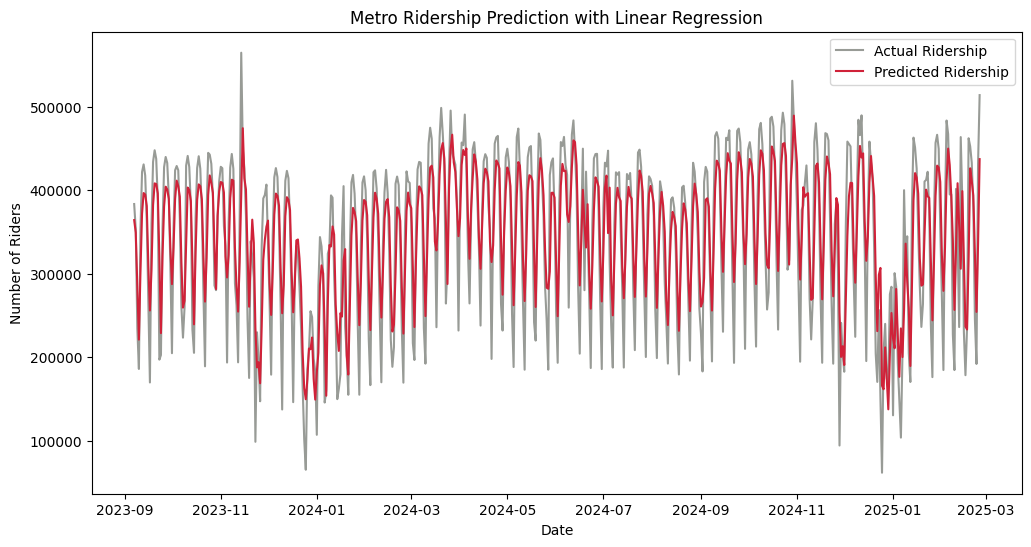

In [ ]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred, label="Predicted Ridership", color=Red)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Linear Regression")
plt.legend()
plt.show()


###Step 3: Model Evaluation

In [ ]:
mae_lr_daily = mean_absolute_error(y_test, y_pred)
mse_lr_daily = mean_squared_error(y_test, y_pred)
rmse_lr_daily = np.sqrt(mse_lr_daily)
r2_lr_daily = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae_lr_daily:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr_daily:.2f}")
print(f"R-squared (R^2): {r2_lr_daily:.2f}")

Mean Absolute Error (MAE): 43545.16
Root Mean Squared Error (RMSE): 52648.47
R-squared (R^2): 0.72


# Prediction Model II - Weekly

### Step 0: Data Preparation

In [ ]:
weekly_data = df.groupby([df.index.year, df.index.isocalendar().week]).agg({'Entries': 'mean', 'Holiday': 'sum'}).reset_index()
weekly_data.columns = ['Year', 'Week', 'Avg_Week_Entries', 'Count_of_Holidays']
weekly_data['Year_Week'] = weekly_data['Year'].astype(str) + '-' + weekly_data['Week'].astype(str)
# Drop the last row of weekly_data
weekly_data = weekly_data.iloc[:-1]
weekly_data

Year  Week  Avg_Week_Entries  Count_of_Holidays Year_Week
0    2020    14      31194.600000                  0   2020-14
1    2020    15      29669.857143                  0   2020-15
2    2020    16      28204.571429                  0   2020-16
3    2020    17      28558.428571                  0   2020-17
4    2020    18      29905.857143                  0   2020-18
..    ...   ...               ...                ...       ...
252  2025     4     328386.571429                  1    2025-4
253  2025     5     364263.714286                  0    2025-5
254  2025     6     361395.428571                  0    2025-6
255  2025     7     320020.142857                  0    2025-7
256  2025     8     342521.428571                  1    2025-8

[257 rows x 5 columns]

In [ ]:
# Lag feature (Previous Week's ridership)
weekly_data['Avg_Last_Week'] = weekly_data['Avg_Week_Entries'].shift(1)
weekly_data['Avg_Last_Week'].fillna(weekly_data['Avg_Week_Entries'], inplace=True)

# Rolling mean (5-Week window)
weekly_data['Avg_Last_Month'] = weekly_data['Avg_Week_Entries'].rolling(window=5, min_periods=1).mean().round(2)
weekly_data

<ipython-input-168-6f114157ff2e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weekly_data['Avg_Last_Week'].fillna(weekly_data['Avg_Week_Entries'], inplace=True)


Year  Week  Avg_Week_Entries  Count_of_Holidays Year_Week  Avg_Last_Week  \
0    2020    14      31194.600000                  0   2020-14   31194.600000   
1    2020    15      29669.857143                  0   2020-15   31194.600000   
2    2020    16      28204.571429                  0   2020-16   29669.857143   
3    2020    17      28558.428571                  0   2020-17   28204.571429   
4    2020    18      29905.857143                  0   2020-18   28558.428571   
..    ...   ...               ...                ...       ...            ...   
252  2025     4     328386.571429                  1    2025-4  369858.571429   
253  2025     5     364263.714286                  0    2025-5  328386.571429   
254  2025     6     361395.428571                  0    2025-6  364263.714286   
255  2025     7     320020.142857                  0    2025-7  361395.428571   
256  2025     8     342521.428571                  1    2025-8  320020.142857   

     Avg_Last_Month  
0          31194.60  
1          30432.23  
2          29689.68  
3          29406.86  
4          29506.66  
..              ...  
252       267529.27  
253       304431.67  
254       334405.91  
255       348784.89  
256       343317.46  

[257 rows x 7 columns]

In [ ]:
def to_datetime(x):
  return datetime.datetime.strptime(x + '-1', "%Y-%W-%w")

weekly_data['Year_Week'] = weekly_data['Year_Week'].apply(to_datetime)
weekly_data = weekly_data.set_index('Year_Week')
weekly_data

Year  Week  Avg_Week_Entries  Count_of_Holidays  Avg_Last_Week  \
Year_Week                                                                    
2020-04-06  2020    14      31194.600000                  0   31194.600000   
2020-04-13  2020    15      29669.857143                  0   31194.600000   
2020-04-20  2020    16      28204.571429                  0   29669.857143   
2020-04-27  2020    17      28558.428571                  0   28204.571429   
2020-05-04  2020    18      29905.857143                  0   28558.428571   
...          ...   ...               ...                ...            ...   
2025-01-27  2025     4     328386.571429                  1  369858.571429   
2025-02-03  2025     5     364263.714286                  0  328386.571429   
2025-02-10  2025     6     361395.428571                  0  364263.714286   
2025-02-17  2025     7     320020.142857                  0  361395.428571   
2025-02-24  2025     8     342521.428571                  1  320020.142857   

            Avg_Last_Month  
Year_Week                   
2020-04-06        31194.60  
2020-04-13        30432.23  
2020-04-20        29689.68  
2020-04-27        29406.86  
2020-05-04        29506.66  
...                    ...  
2025-01-27       267529.27  
2025-02-03       304431.67  
2025-02-10       334405.91  
2025-02-17       348784.89  
2025-02-24       343317.46  

[257 rows x 6 columns]

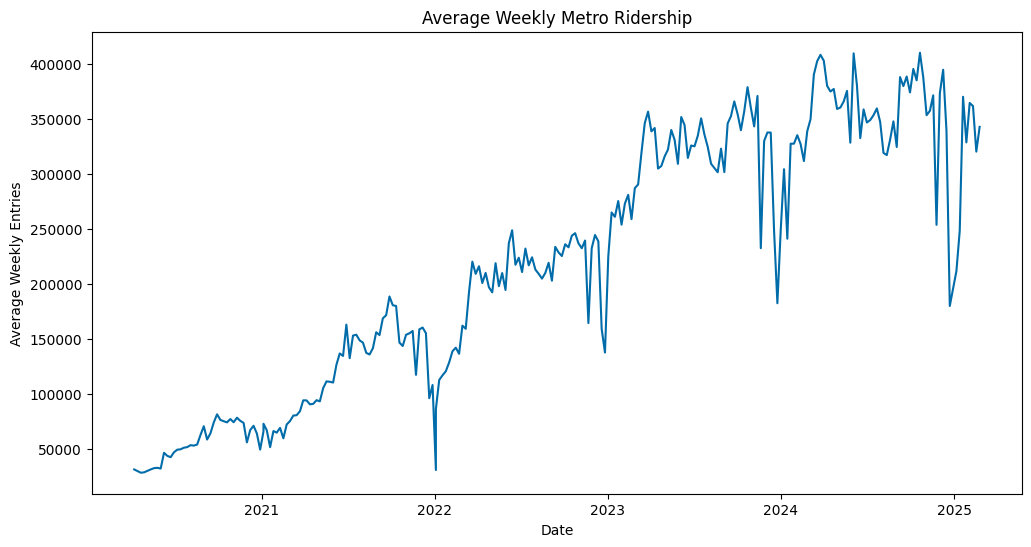

In [ ]:
# plot weekly_data
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Avg_Week_Entries'], color=Blue)
plt.xlabel('Date')
plt.ylabel('Average Weekly Entries')
plt.title('Average Weekly Metro Ridership')
plt.show()

### Step 1: Split Data into Train and Test Data

In [ ]:
# Separate X, Y
features = ['Year','Week','Count_of_Holidays','Avg_Last_Week','Avg_Last_Month']
target = 'Avg_Week_Entries'
X = weekly_data[features]
y = weekly_data[target]

# Train-test split (70% train, 30% test)
train_size = int(len(weekly_data) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Step 2: Explore Different Models

#### Linear Regression Model

Mean Absolute Error (MAE): 23131.63
Root Mean Squared Error (RMSE): 33526.01
R-squared (R^2): 0.53


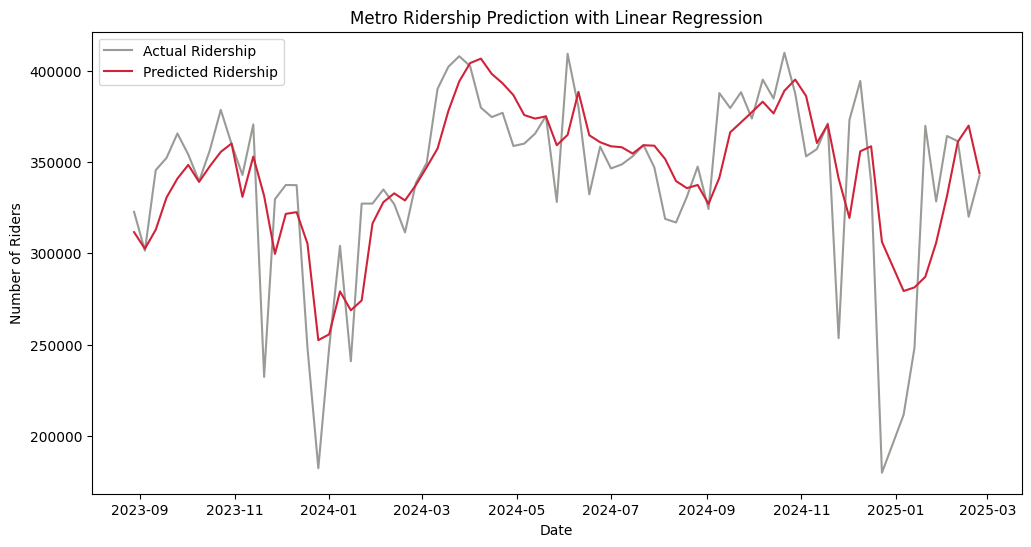

In [ ]:
# Initialize and train the model
lr_week_model = LinearRegression()
lr_week_model.fit(X_train, y_train)

# Make predictions
y_pred_week = lr_week_model.predict(X_test)

# Make predictions
y_pred_week = lr_week_model.predict(X_test)

# Evaluation
mae_lr_week = mean_absolute_error(y_test, y_pred_week)
mse_lr_week = mean_squared_error(y_test, y_pred_week)
rmse_lr_week = np.sqrt(mse_lr_week)
r_squared_lr = r2_score(y_test, y_pred_week)

print(f"Mean Absolute Error (MAE): {mae_lr_week:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr_week:.2f}")
print(f"R-squared (R^2): {r_squared_lr:.2f}")

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_week, label="Predicted Ridership", color=Red)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Linear Regression")
plt.legend()
plt.show()

####Polynomial Regression


Polynomial Regression - Mean Absolute Error (MAE): 27271.41
Polynomial Regression - Root Mean Squared Error (RMSE): 35332.04
Polynomial Regression - R-squared (R^2): 0.48


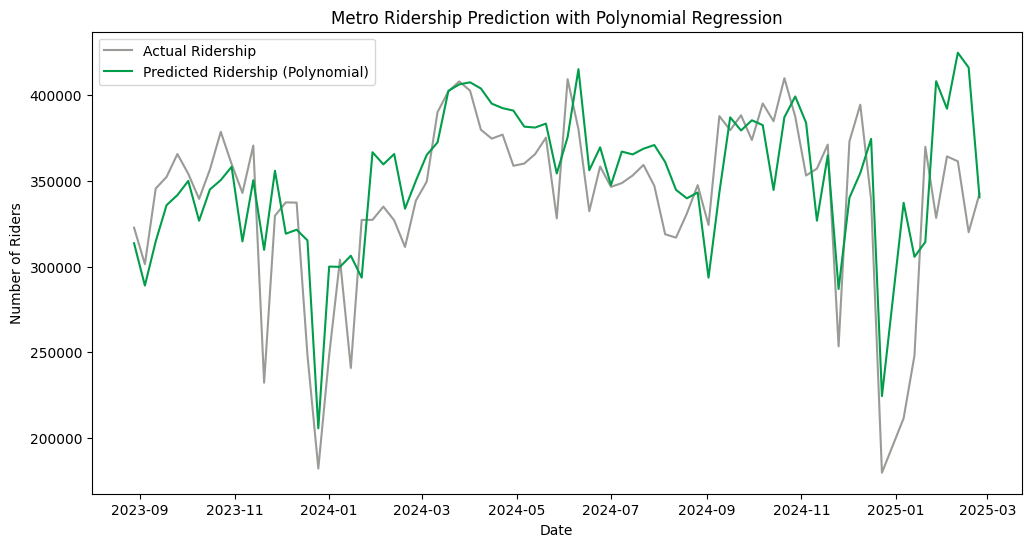

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Example: degree 2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply MinMaxScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly_scaled, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly_scaled)

# Evaluate polynomial regression model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Polynomial Regression - Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"Polynomial Regression - R-squared (R^2): {r2_poly:.2f}")

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_poly, label="Predicted Ridership (Polynomial)", color=Green)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Polynomial Regression")
plt.legend()
plt.show()



####Ridge Regression

Ridge Regression - Mean Absolute Error (MAE): 23164.66
Ridge Regression - Root Mean Squared Error (RMSE): 33545.40
Ridge Regression - R-squared (R^2): 0.53


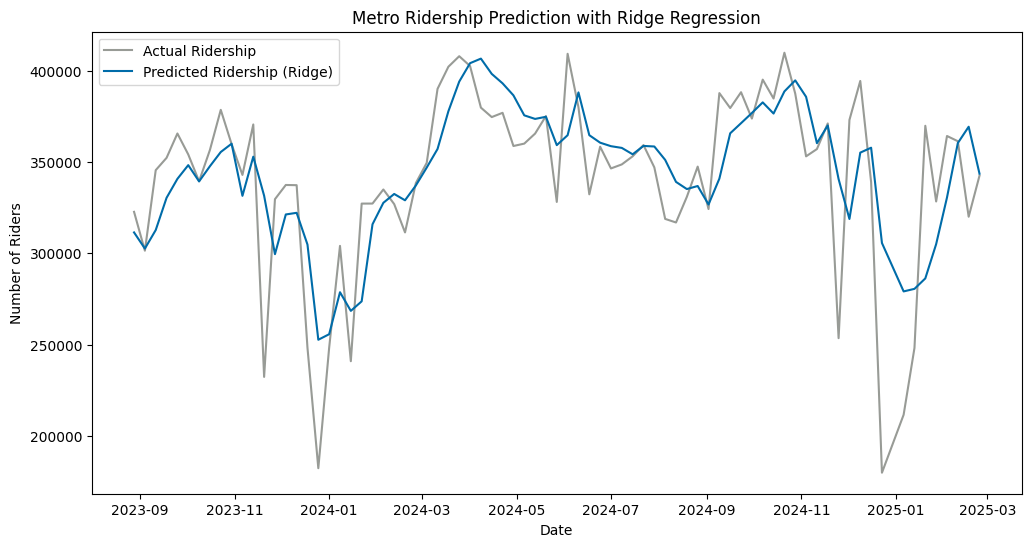

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Ridge Regression - Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"Ridge Regression - R-squared (R^2): {r2_ridge:.2f}")

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_ridge, label="Predicted Ridership (Ridge)", color=Blue)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Ridge Regression")
plt.legend()
plt.show()

#### Lasso Regression

Lasso Regression - Mean Absolute Error (MAE): 23131.97
Lasso Regression - Root Mean Squared Error (RMSE): 33525.55
Lasso Regression - R-squared (R^2): 0.53


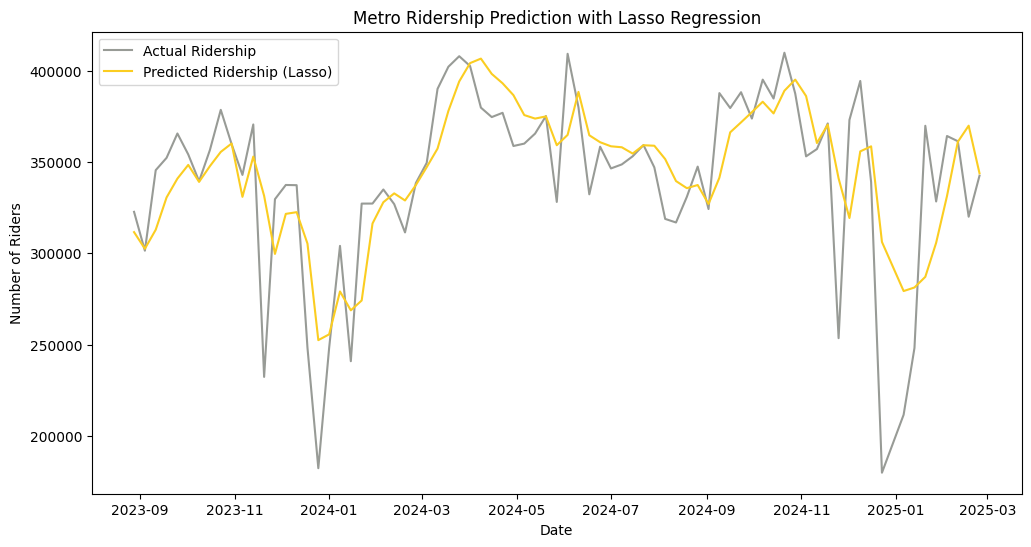

In [ ]:
# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions with Lasso Regression
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso Regression model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Lasso Regression - Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"Lasso Regression - R-squared (R^2): {r2_lasso:.2f}")

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_lasso, label="Predicted Ridership (Lasso)", color=Yellow)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Lasso Regression")
plt.legend()
plt.show()

#### Random Forest Regressor

Random Forest Regression - Mean Absolute Error (MAE): 39553.37
Random Forest Regression - Root Mean Squared Error (RMSE): 47885.59
Random Forest Regression - R-squared (R^2): 0.05


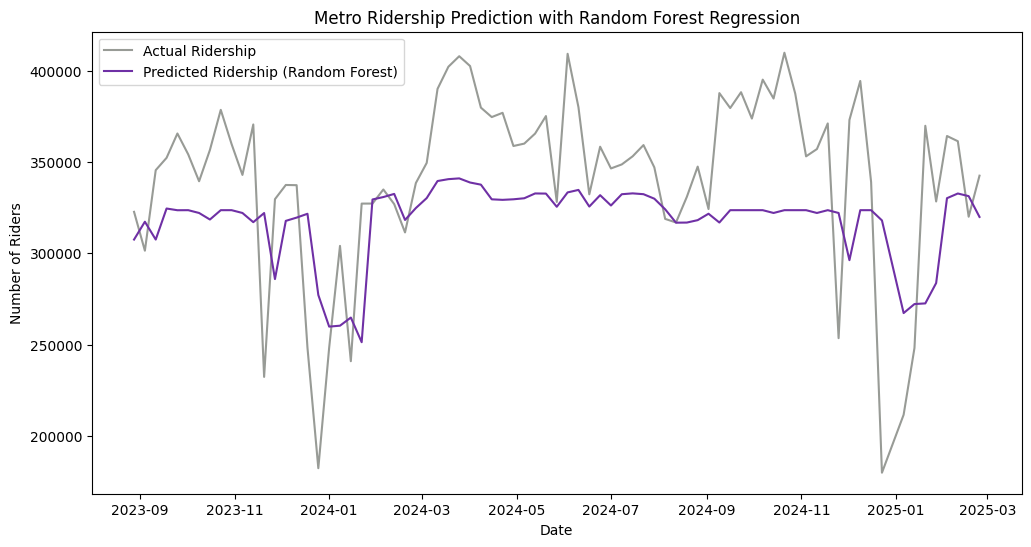

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regressor model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest Regression - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest Regression - R-squared (R^2): {r2_rf:.2f}")

# Plot actual vs predicted ridership for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_rf, label="Predicted Ridership (Random Forest)", color=Purple)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Random Forest Regression")
plt.legend()
plt.show()


#### XGBRegressor


XGBoost Regression - Mean Absolute Error (MAE): 47934.54
XGBoost Regression - Root Mean Squared Error (RMSE): 54352.27
XGBoost Regression - R-squared (R^2): -0.22


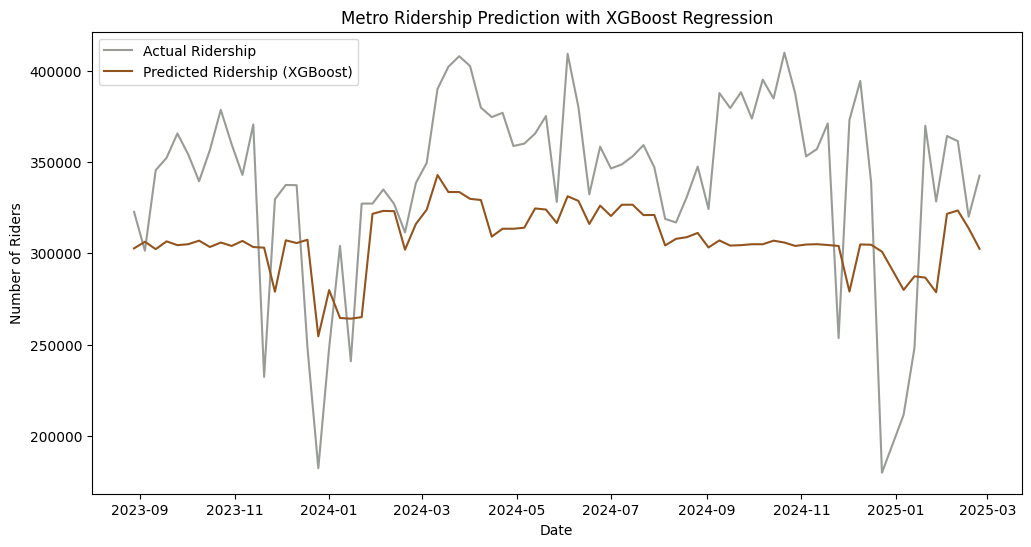

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=1) # You can adjust hyperparameters
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost Regressor
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost Regressor model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression - Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"XGBoost Regression - Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"XGBoost Regression - R-squared (R^2): {r2_xgb:.2f}")

# Plot actual vs predicted ridership for XGBoost
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_xgb, label="Predicted Ridership (XGBoost)", color=Brown)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with XGBoost Regression")
plt.legend()
plt.show()


#### ARIMA (Autoregressive Integrated Moving Average)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA - Mean Absolute Error (MAE): 55134.66
ARIMA - Root Mean Squared Error (RMSE): 61661.73
ARIMA - R-squared (R^2): -0.58


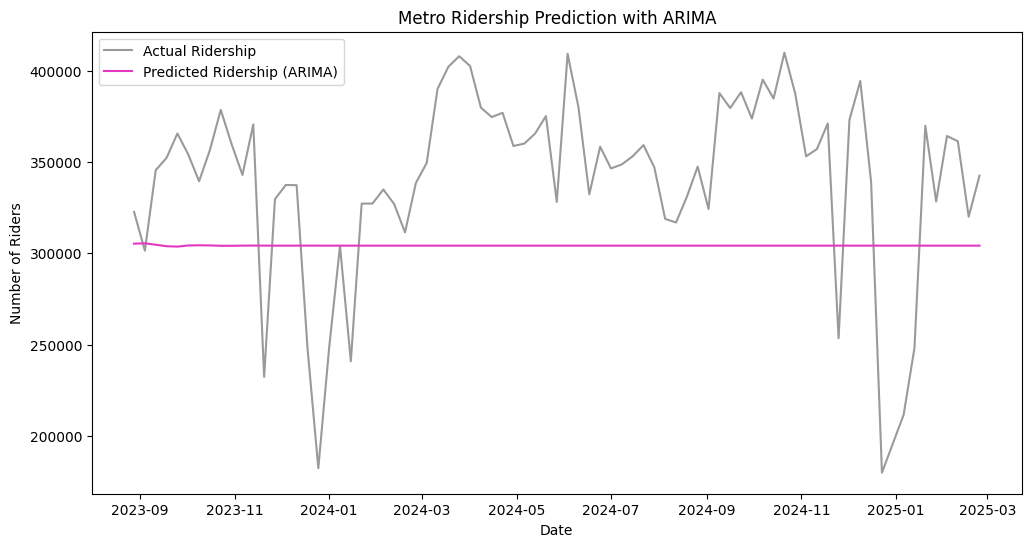

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'y' is your time series data (weekly ridership)
# You might need to adjust the (p, d, q) order based on your data's ACF and PACF plots
# Example order (5,1,0):
model = ARIMA(y_train, order=(5, 1, 0)) # Try different order values (p,d,q)
model_fit = model.fit()

# Make predictions
y_pred_arima = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)


# Evaluate ARIMA model
mae_arima = mean_absolute_error(y_test, y_pred_arima)
mse_arima = mean_squared_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(y_test, y_pred_arima)

print(f"ARIMA - Mean Absolute Error (MAE): {mae_arima:.2f}")
print(f"ARIMA - Root Mean Squared Error (RMSE): {rmse_arima:.2f}")
print(f"ARIMA - R-squared (R^2): {r2_arima:.2f}")

# Plot actual vs predicted ridership for ARIMA
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_arima, label="Predicted Ridership (ARIMA)", color=Pink)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with ARIMA")
plt.legend()
plt.show()


# Summary of Weekly data prediction

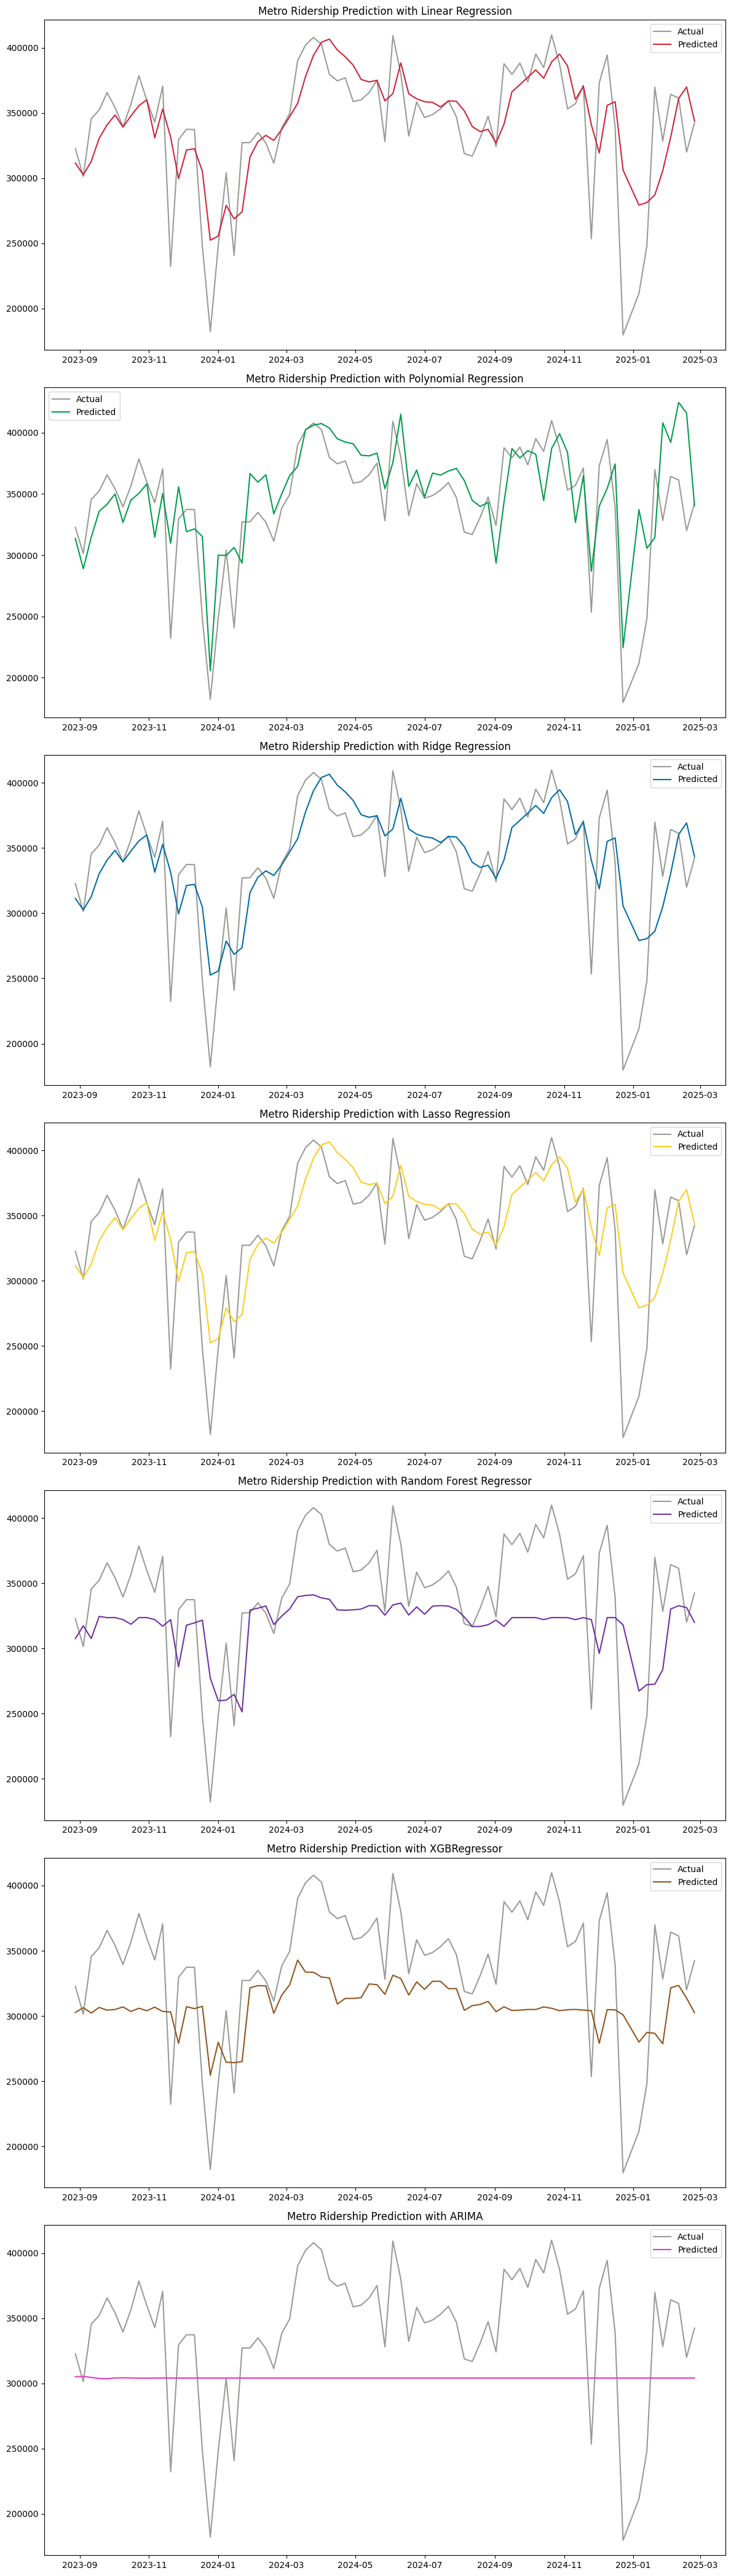

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(12, 42))  # Adjust figsize as needed

# Plot 1: Linear Regression
axes[0].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[0].plot(y_test.index, y_pred_week, label="Predicted", color=Red)
axes[0].set_title("Metro Ridership Prediction with Linear Regression")
axes[0].legend()

# Plot 2: Polynomial Regression
axes[1].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[1].plot(y_test.index, y_pred_poly, label="Predicted", color=Green)
axes[1].set_title("Metro Ridership Prediction with Polynomial Regression")
axes[1].legend()

# Plot 3: Ridge Regression
axes[2].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[2].plot(y_test.index, y_pred_ridge, label="Predicted", color=Blue)
axes[2].set_title("Metro Ridership Prediction with Ridge Regression")
axes[2].legend()

# Plot 4: Lasso Regression
axes[3].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[3].plot(y_test.index, y_pred_lasso, label="Predicted", color=Yellow)
axes[3].set_title("Metro Ridership Prediction with Lasso Regression")
axes[3].legend()


# Plot 5: Random Forest Regressor
axes[4].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[4].plot(y_test.index, y_pred_rf, label="Predicted", color=Purple)
axes[4].set_title("Metro Ridership Prediction with Random Forest Regressor")
axes[4].legend()

# Plot 6: XGBRegressor
axes[5].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[5].plot(y_test.index, y_pred_xgb, label="Predicted", color=Brown)
axes[5].set_title("Metro Ridership Prediction with XGBRegressor")
axes[5].legend()

# Plot 7: ARIMA
axes[6].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[6].plot(y_test.index, y_pred_arima, label="Predicted", color=Pink)
axes[6].set_title("Metro Ridership Prediction with ARIMA")
axes[6].legend()

plt.tight_layout()
plt.show()


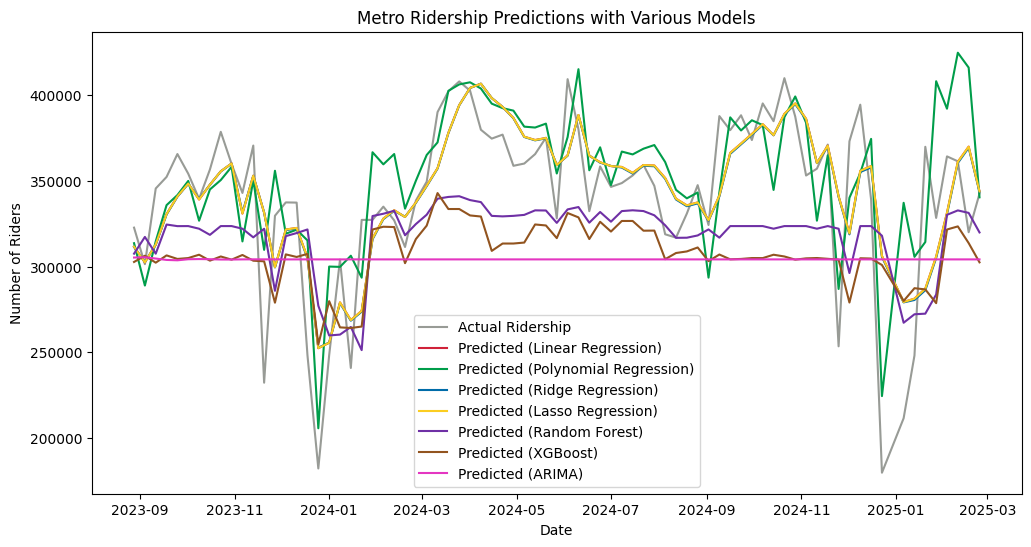

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_week, label="Predicted (Linear Regression)", color=Red)
plt.plot(y_test.index, y_pred_poly, label="Predicted (Polynomial Regression)", color=Green)
plt.plot(y_test.index, y_pred_ridge, label="Predicted (Ridge Regression)", color=Blue)
plt.plot(y_test.index, y_pred_lasso, label="Predicted (Lasso Regression)", color=Yellow)
plt.plot(y_test.index, y_pred_rf, label="Predicted (Random Forest)", color=Purple)
plt.plot(y_test.index, y_pred_xgb, label="Predicted (XGBoost)", color=Brown)
plt.plot(y_test.index, y_pred_arima, label="Predicted (ARIMA)", color=Pink)


plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Predictions with Various Models")
plt.legend()
plt.show()


# Prediction with weather data

## Step 0: Prepare Weekly Ridership with Weather dataframe

In [ ]:
weekly_weather = df.groupby([df.index.year, df.index.isocalendar().week]).agg(
                            {'Entries': 'mean',
                             'Holiday': 'sum',
                             'temp': 'mean',
                             'tempmin': 'mean',
                             'tempmax': 'mean',
                             'feelslike': 'mean',
                             'feelslikemin': 'mean',
                             'feelslikemax': 'mean',
                             'has_rain': 'sum',
                             'precip': 'mean',
                             'precipprob': 'mean',
                             'has_snow': 'sum',
                             'snowdepth': 'sum',
                             'windspeed': 'mean',
                             'cloudcover': 'mean',
                             'visibility': 'mean' }    ).reset_index()
weekly_weather.columns = ['Year', 'Week', 'Avg_Week_Entries', 'Count_of_Holidays',
                          'Avg_Temp', 'Avg_Min_Temp', 'Avg_Max_Temp', 'Avg_Feel',
                          'Avg_Feel_Min', 'Avg_Feel_Max', 'Count_Rain', 'Avg_Precip',
                          'Avg_Precip_Prob', 'Count_Snow', 'Sum_Snow_Depth',
                          'Avg_Windspeed', 'Avg_Cloudcover', 'Avg_Visibility']
weekly_weather['Year_Week'] = weekly_weather['Year'].astype(str) + '-' + weekly_weather['Week'].astype(str)
# Drop the last row of weekly_weather
weekly_weather = weekly_weather.iloc[:-1]


In [ ]:
# Lag feature (Previous Week's ridership)
weekly_weather['Avg_Last_Week'] = weekly_weather['Avg_Week_Entries'].shift(1)
weekly_weather['Avg_Last_Week'].fillna(weekly_weather['Avg_Week_Entries'], inplace=True)

# Rolling mean (5-Week window)
weekly_weather['Avg_Last_Month'] = weekly_weather['Avg_Week_Entries'].rolling(window=5, min_periods=1).mean().round(2)


<ipython-input-182-551e62202a82>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weekly_weather['Avg_Last_Week'].fillna(weekly_weather['Avg_Week_Entries'], inplace=True)


In [ ]:
def to_datetime(x):
  return datetime.datetime.strptime(x + '-1', "%Y-%W-%w")

# Set the index to Year_Week
weekly_weather['Year_Week'] = weekly_weather['Year_Week'].apply(to_datetime)
weekly_weather = weekly_weather.set_index('Year_Week')
weekly_weather

Year  Week  Avg_Week_Entries  Count_of_Holidays   Avg_Temp  \
Year_Week                                                                
2020-04-06  2020    14      31194.600000                  0  53.880000   
2020-04-13  2020    15      29669.857143                  0  57.700000   
2020-04-20  2020    16      28204.571429                  0  52.071429   
2020-04-27  2020    17      28558.428571                  0  54.285714   
2020-05-04  2020    18      29905.857143                  0  58.857143   
...          ...   ...               ...                ...        ...   
2025-01-27  2025     4     328386.571429                  1  26.514286   
2025-02-03  2025     5     364263.714286                  0  42.985714   
2025-02-10  2025     6     361395.428571                  0  41.757143   
2025-02-17  2025     7     320020.142857                  0  38.814286   
2025-02-24  2025     8     342521.428571                  1  32.200000   

            Avg_Min_Temp  Avg_Max_Temp   Avg_Feel  Avg_Feel_Min  Avg_Feel_Max  \
Year_Week                                                                       
2020-04-06     45.780000     62.420000  52.380000     40.640000     62.420000   
2020-04-13     48.700000     68.500000  56.614286     45.442857     68.500000   
2020-04-20     43.600000     60.414286  50.385714     39.157143     60.414286   
2020-04-27     48.142857     61.614286  53.657143     45.814286     61.614286   
2020-05-04     51.314286     67.300000  58.385714     49.900000     67.300000   
...                  ...           ...        ...           ...           ...   
2025-01-27     19.557143     33.542857  20.157143     10.142857     30.371429   
2025-02-03     33.571429     52.257143  39.328571     27.800000     51.600000   
2025-02-10     35.342857     48.871429  37.957143     29.685714     47.528571   
2025-02-17     34.585714     46.714286  33.928571     26.657143     44.571429   
2025-02-24     25.971429     39.171429  23.714286     15.357143     32.585714   

            Count_Rain  Avg_Precip  Avg_Precip_Prob  Count_Snow  \
Year_Week                                                         
2020-04-06           1    0.002400        20.000000           0   
2020-04-13           4    0.078286        57.142857           0   
2020-04-20           4    0.408714        57.142857           0   
2020-04-27           5    0.237714        71.428571           0   
2020-05-04           5    0.246143        71.428571           0   
...                ...         ...              ...         ...   
2025-01-27           0    0.000000         0.000000           0   
2025-02-03           2    0.107000        28.571429           0   
2025-02-10           3    0.131429        42.857143           3   
2025-02-17           5    0.221143        71.428571           2   
2025-02-24           0    0.000000         0.000000           0   

            Sum_Snow_Depth  Avg_Windspeed  Avg_Cloudcover  Avg_Visibility  \
Year_Week                                                                   
2020-04-06             0.0      18.840000       57.780000        9.900000   
2020-04-13             0.0      19.414286       50.671429        9.842857   
2020-04-20             0.0      20.271429       54.400000        9.528571   
2020-04-27             0.0      15.557143       69.085714        9.100000   
2020-05-04             0.0      16.842857       63.242857        9.414286   
...                    ...            ...             ...             ...   
2025-01-27             0.0      12.914286       56.185714        9.900000   
2025-02-03             0.0      16.100000       50.228571        9.514286   
2025-02-10             0.0      15.942857       74.142857        9.328571   
2025-02-17            10.1      16.142857       77.428571        7.485714   
2025-02-24             0.0      19.742857       53.228571        9.842857   

            Avg_Last_Week  Avg_Last_Month  
Year_Week                                  
2020-04-06   31194.600000        

## Step 1:EDA with Weekly Ridership and Weather data

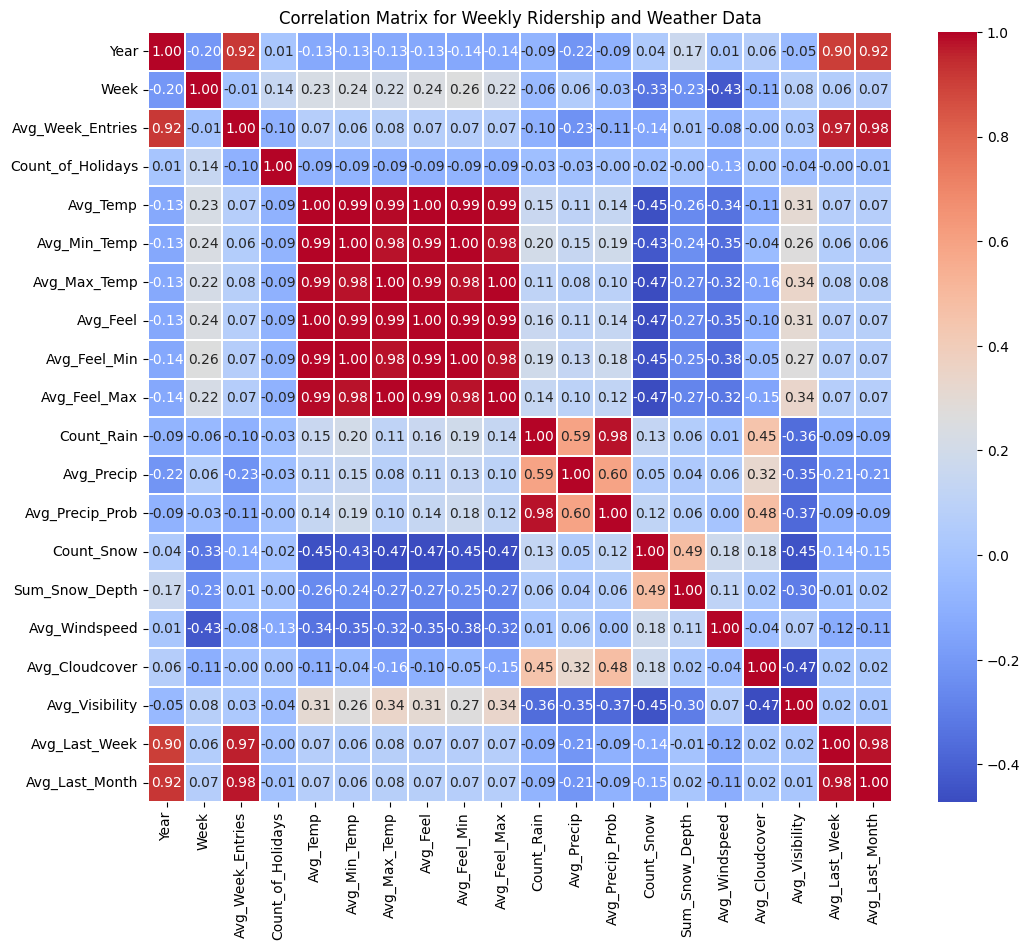

In [ ]:
corr_matrix = weekly_weather.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.3)
plt.title("Correlation Matrix for Weekly Ridership and Weather Data")
plt.show()


## Step 2: Split Data into Train and Test Data

In [ ]:
# Separate features and target
target = 'Avg_Week_Entries'
features = [col for col in weekly_weather.columns if col != target]
X = weekly_weather[features]
y = weekly_weather[target]

# Train-test split (70% train, 30% test)
train_size = int(len(weekly_data) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Step 3: Explore with Different Models

### Linear Regression

Linear Regression with Weather - Mean Absolute Error (MAE): 24273.36
Linear Regression with Weather - Root Mean Squared Error (RMSE): 34856.27
Linear Regression with Weather - R-squared (R^2): 0.50


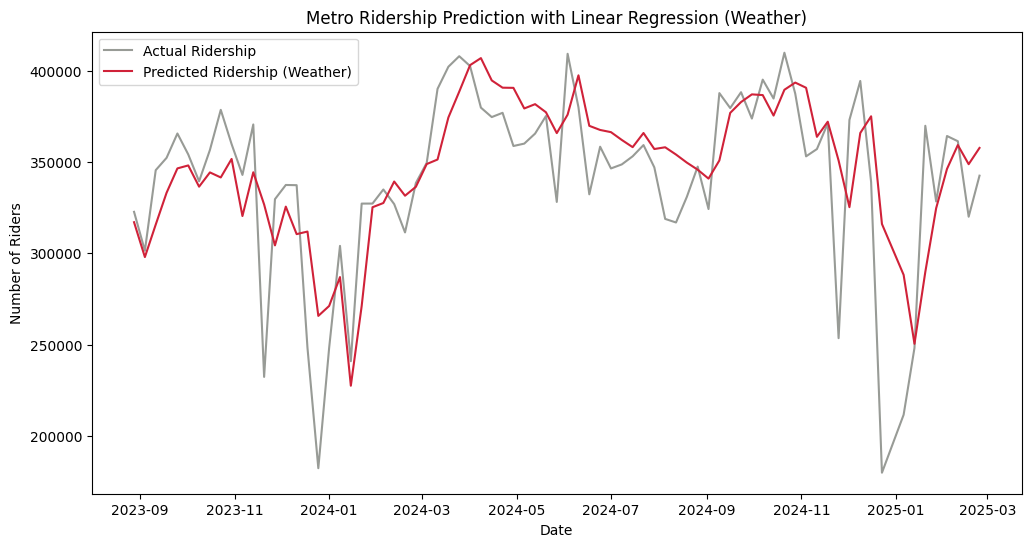

In [ ]:
# Initialize and train the Linear Regression model
lr_weather_model = LinearRegression()
lr_weather_model.fit(X_train, y_train)

# Make predictions
y_pred_weather = lr_weather_model.predict(X_test)

# Evaluate the model
mae_lr_weather = mean_absolute_error(y_test, y_pred_weather)
mse_lr_weather = mean_squared_error(y_test, y_pred_weather)
rmse_lr_weather = np.sqrt(mse_lr_weather)
r2_lr_weather = r2_score(y_test, y_pred_weather)

print(f"Linear Regression with Weather - Mean Absolute Error (MAE): {mae_lr_weather:.2f}")
print(f"Linear Regression with Weather - Root Mean Squared Error (RMSE): {rmse_lr_weather:.2f}")
print(f"Linear Regression with Weather - R-squared (R^2): {r2_lr_weather:.2f}")

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_weather, label="Predicted Ridership (Weather)", color=Red)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Linear Regression (Weather)")
plt.legend()
plt.show()


###Polynomial Regression

Polynomial Regression with Weather - Mean Absolute Error (MAE): 329046.13
Polynomial Regression with Weather - Root Mean Squared Error (RMSE): 1813003.92
Polynomial Regression with Weather - R-squared (R^2): -1361.94


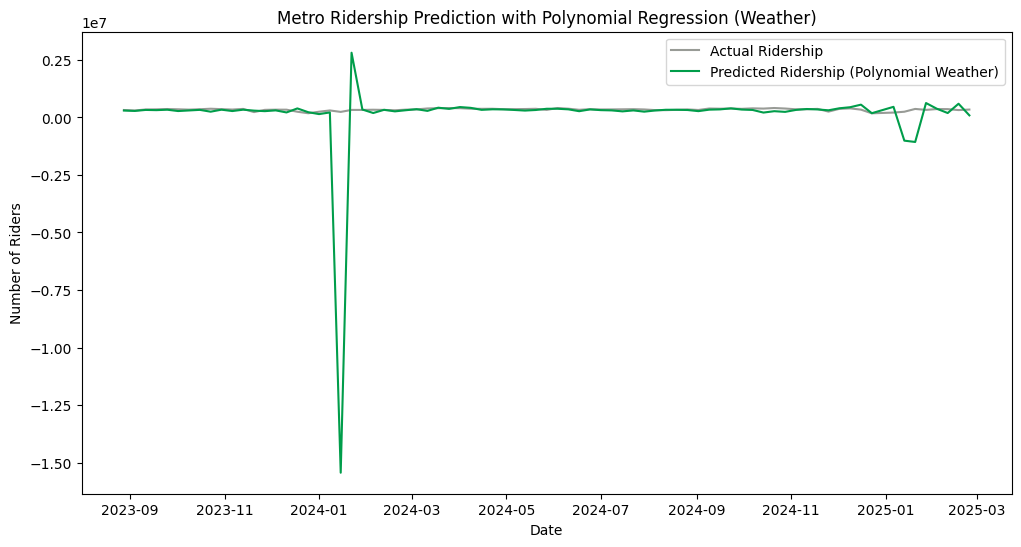

In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=2) # Example: degree 2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the polynomial regression model
poly_weather_model = LinearRegression()
poly_weather_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly_weather = poly_weather_model.predict(X_test_poly)

# Evaluate polynomial regression model
mae_poly_weather = mean_absolute_error(y_test, y_pred_poly_weather)
mse_poly_weather = mean_squared_error(y_test, y_pred_poly_weather)
rmse_poly_weather = np.sqrt(mse_poly_weather)
r2_poly_weather = r2_score(y_test, y_pred_poly_weather)

print(f"Polynomial Regression with Weather - Mean Absolute Error (MAE): {mae_poly_weather:.2f}")
print(f"Polynomial Regression with Weather - Root Mean Squared Error (RMSE): {rmse_poly_weather:.2f}")
print(f"Polynomial Regression with Weather - R-squared (R^2): {r2_poly_weather:.2f}")

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_poly_weather, label="Predicted Ridership (Polynomial Weather)", color=Green)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Polynomial Regression (Weather)")
plt.legend()
plt.show()



### Ridge Regression
### Shrinks correlated features but keeps them.

Ridge Regression with Weather - Mean Absolute Error (MAE): 24152.51
Ridge Regression with Weather - Root Mean Squared Error (RMSE): 34683.69
Ridge Regression with Weather - R-squared (R^2): 0.50


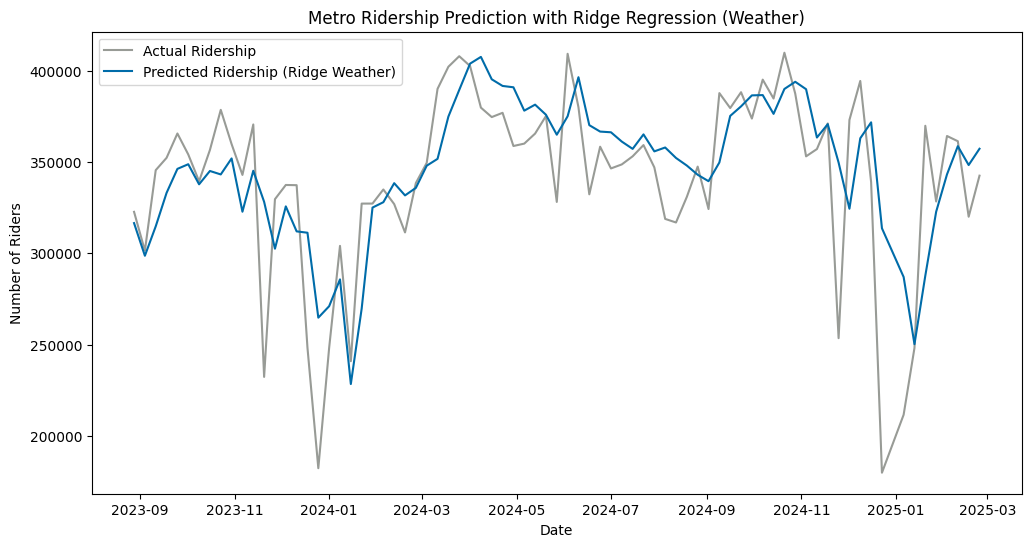

In [ ]:
# Initialize and train the Ridge Regression model
ridge_weather_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_weather_model.fit(X_train, y_train)

# Make predictions with Ridge Regression
y_pred_ridge_weather = ridge_weather_model.predict(X_test)

# Evaluate Ridge Regression model
mae_ridge_weather = mean_absolute_error(y_test, y_pred_ridge_weather)
mse_ridge_weather = mean_squared_error(y_test, y_pred_ridge_weather)
rmse_ridge_weather = np.sqrt(mse_ridge_weather)
r2_ridge_weather = r2_score(y_test, y_pred_ridge_weather)

print(f"Ridge Regression with Weather - Mean Absolute Error (MAE): {mae_ridge_weather:.2f}")
print(f"Ridge Regression with Weather - Root Mean Squared Error (RMSE): {rmse_ridge_weather:.2f}")
print(f"Ridge Regression with Weather - R-squared (R^2): {r2_ridge_weather:.2f}")

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_ridge_weather, label="Predicted Ridership (Ridge Weather)", color=Blue)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Ridge Regression (Weather)")
plt.legend()
plt.show()

### Lasso Regression
### Eliminates weak correlated features.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.556e+10, tolerance: 1.576e+08
  model = cd_fast.enet_coordinate_descent(


Lasso Regression with Weather - Mean Absolute Error (MAE): 24509.40
Lasso Regression with Weather - Root Mean Squared Error (RMSE): 35286.55
Lasso Regression with Weather - R-squared (R^2): 0.48


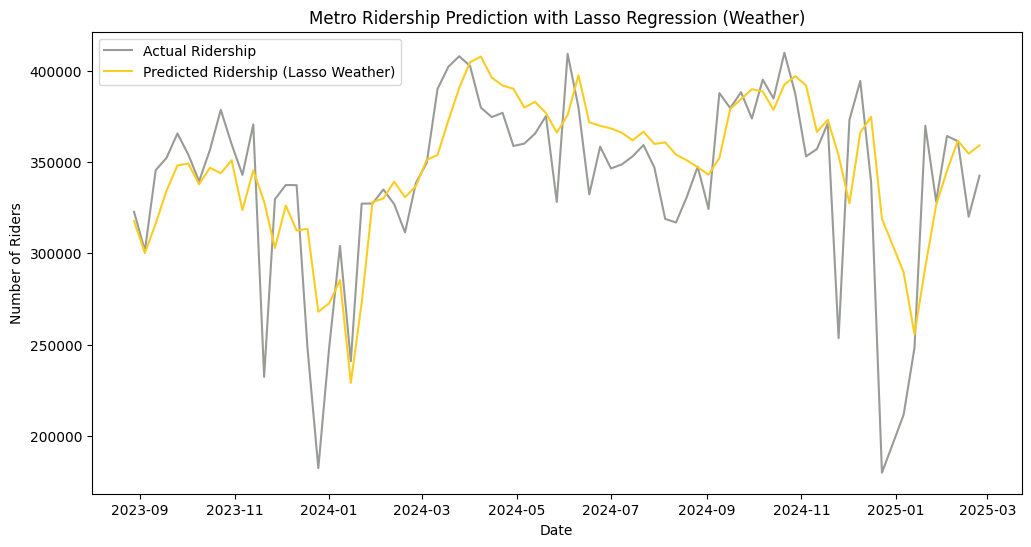

In [ ]:
# Initialize and train the Lasso Regression model
lasso_weather_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_weather_model.fit(X_train, y_train)

# Make predictions with Lasso Regression
y_pred_lasso_weather = lasso_weather_model.predict(X_test)

# Evaluate Lasso Regression model
mae_lasso_weather = mean_absolute_error(y_test, y_pred_lasso_weather)
mse_lasso_weather = mean_squared_error(y_test, y_pred_lasso_weather)
rmse_lasso_weather = np.sqrt(mse_lasso_weather)
r2_lasso_weather = r2_score(y_test, y_pred_lasso_weather)

print(f"Lasso Regression with Weather - Mean Absolute Error (MAE): {mae_lasso_weather:.2f}")
print(f"Lasso Regression with Weather - Root Mean Squared Error (RMSE): {rmse_lasso_weather:.2f}")
print(f"Lasso Regression with Weather - R-squared (R^2): {r2_lasso_weather:.2f}")

# Plot actual vs predicted ridership
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_lasso_weather, label="Predicted Ridership (Lasso Weather)", color=Yellow)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Lasso Regression (Weather)")
plt.legend()
plt.show()


In [ ]:
# Get feature importance (coefficients)
lasso_coef = pd.DataFrame({'Feature': features, 'Coefficient': lasso_weather_model.coef_})

# Keep only non-zero coefficients (selected features)
selected_features = lasso_coef[lasso_coef['Coefficient'] != 0]

print("Selected Features by Lasso Regression:")
print(selected_features)

Selected Features by Lasso Regression:
              Feature   Coefficient
0                Year  15647.737760
1                Week   -122.411146
2   Count_of_Holidays -11330.964689
3            Avg_Temp   2976.226516
4        Avg_Min_Temp   -849.002267
5        Avg_Max_Temp  -1848.432375
6            Avg_Feel    976.416150
7        Avg_Feel_Min      4.148823
8        Avg_Feel_Max  -1042.533440
9          Count_Rain  13335.638576
10         Avg_Precip -11549.167574
11    Avg_Precip_Prob   -997.471613
12         Count_Snow  -4114.717546
13     Sum_Snow_Depth  -1488.374624
14      Avg_Windspeed    293.281797
15     Avg_Cloudcover    -22.532512
16     Avg_Visibility  -2531.690074
17      Avg_Last_Week      0.266870
18     Avg_Last_Month      0.554412


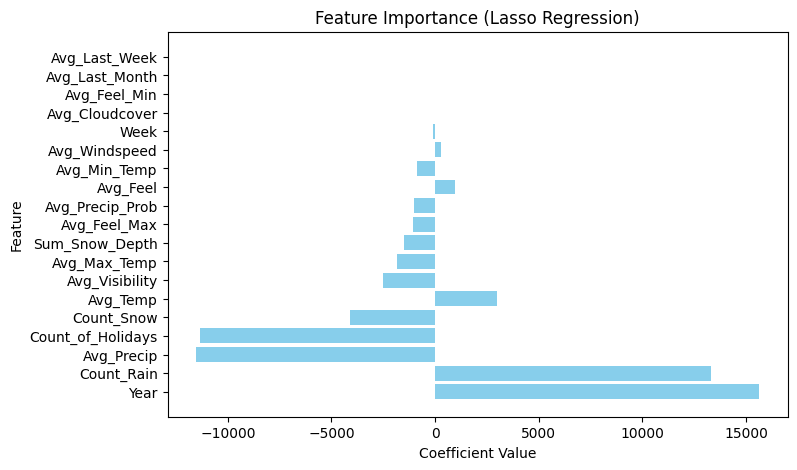

In [ ]:
# Sort features by absolute coefficient value
selected_features = selected_features.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(selected_features['Feature'], selected_features['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Lasso Regression)")
plt.show()

### Random Forest Regressor

Random Forest Regression with Weather - Mean Absolute Error (MAE): 38806.26
Random Forest Regression with Weather - Root Mean Squared Error (RMSE): 47712.84
Random Forest Regression with Weather - R-squared (R^2): 0.06


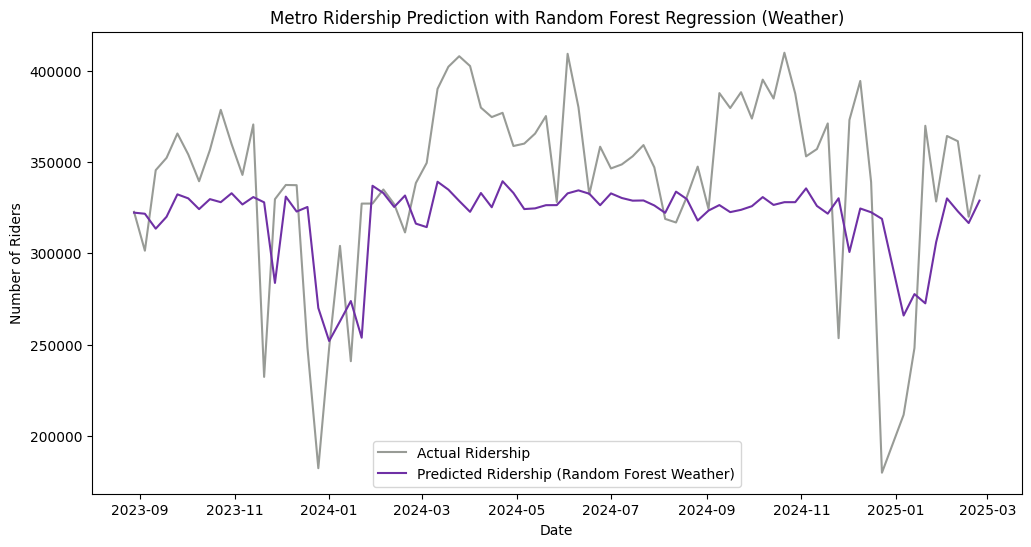

In [ ]:
# Initialize and train the Random Forest Regressor model
rf_weather_model = RandomForestRegressor(n_estimators=15, random_state=1)  # You can adjust hyperparameters
rf_weather_model.fit(X_train, y_train)

# Make predictions with Random Forest Regressor
y_pred_rf_weather = rf_weather_model.predict(X_test)

# Evaluate Random Forest Regressor model
mae_rf_weather = mean_absolute_error(y_test, y_pred_rf_weather)
mse_rf_weather = mean_squared_error(y_test, y_pred_rf_weather)
rmse_rf_weather = np.sqrt(mse_rf_weather)
r2_rf_weather = r2_score(y_test, y_pred_rf_weather)

print(f"Random Forest Regression with Weather - Mean Absolute Error (MAE): {mae_rf_weather:.2f}")
print(f"Random Forest Regression with Weather - Root Mean Squared Error (RMSE): {rmse_rf_weather:.2f}")
print(f"Random Forest Regression with Weather - R-squared (R^2): {r2_rf_weather:.2f}")

# Plot actual vs predicted ridership for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_rf_weather, label="Predicted Ridership (Random Forest Weather)", color=Purple)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with Random Forest Regression (Weather)")
plt.legend()
plt.show()


### XGBRegressor

XGBoost Regression with Weather - Mean Absolute Error (MAE): 47772.01
XGBoost Regression with Weather - Root Mean Squared Error (RMSE): 55049.01
XGBoost Regression with Weather - R-squared (R^2): -0.26


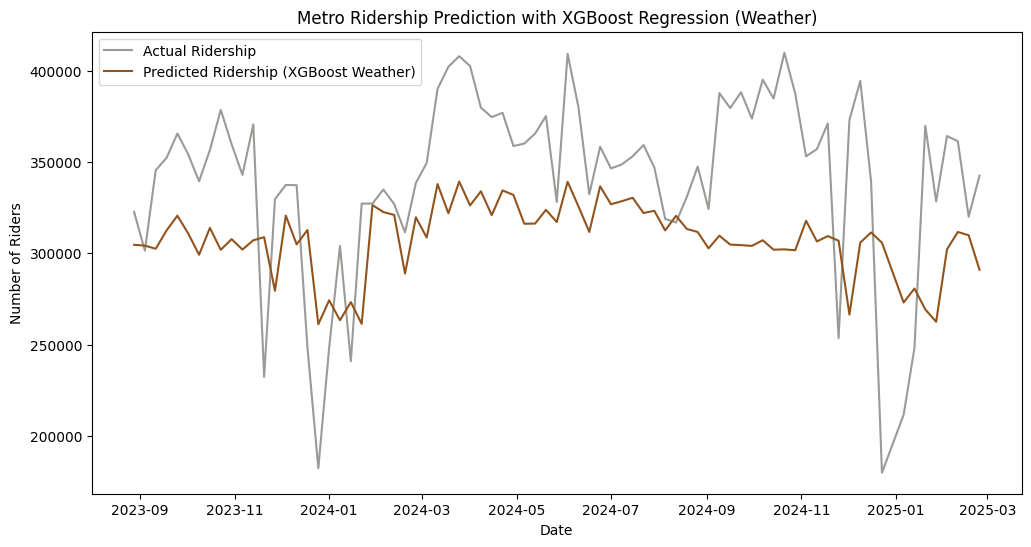

In [ ]:
# Initialize and train the XGBoost Regressor model
xgb_weather_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=1) # You can adjust hyperparameters
xgb_weather_model.fit(X_train, y_train)

# Make predictions with XGBoost Regressor
y_pred_xgb_weather = xgb_weather_model.predict(X_test)

# Evaluate XGBoost Regressor model
mae_xgb_weather = mean_absolute_error(y_test, y_pred_xgb_weather)
mse_xgb_weather = mean_squared_error(y_test, y_pred_xgb_weather)
rmse_xgb_weather = np.sqrt(mse_xgb_weather)
r2_xgb_weather = r2_score(y_test, y_pred_xgb_weather)

print(f"XGBoost Regression with Weather - Mean Absolute Error (MAE): {mae_xgb_weather:.2f}")
print(f"XGBoost Regression with Weather - Root Mean Squared Error (RMSE): {rmse_xgb_weather:.2f}")
print(f"XGBoost Regression with Weather - R-squared (R^2): {r2_xgb_weather:.2f}")

# Plot actual vs predicted ridership for XGBoost
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_xgb_weather, label="Predicted Ridership (XGBoost Weather)", color=Brown)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with XGBoost Regression (Weather)")
plt.legend()
plt.show()


### ARIMA (Autoregressive Integrated Moving Average)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA - Mean Absolute Error (MAE): 55134.66
ARIMA - Root Mean Squared Error (RMSE): 61661.73
ARIMA - R-squared (R^2): -0.58


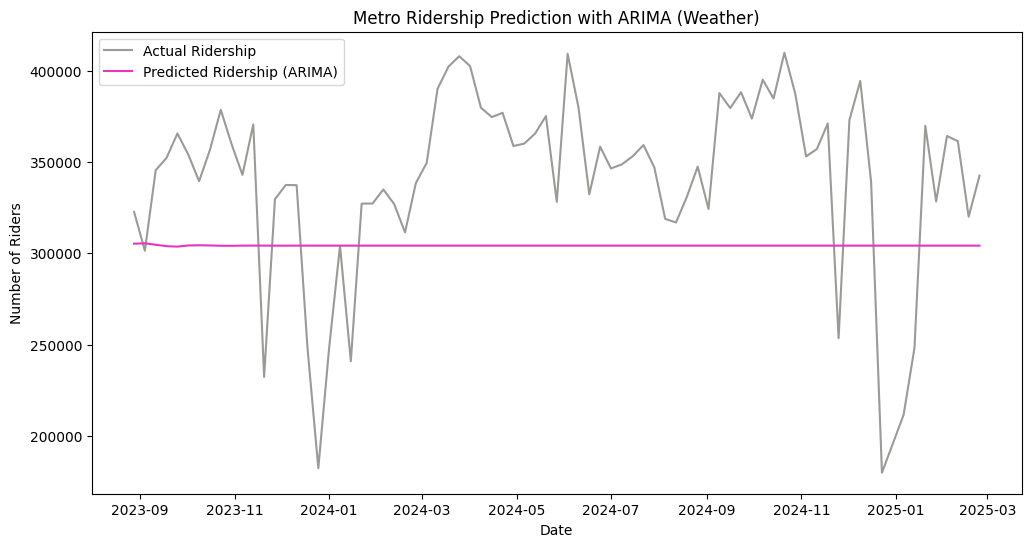

In [ ]:
# Assuming 'y' is your time series data (weekly ridership)
# You might need to adjust the (p, d, q) order based on your data's ACF and PACF plots
# Example order (5,1,0):
model = ARIMA(y_train, order=(5, 1, 0)) # Try different order values (p,d,q)
model_fit = model.fit()

# Make predictions
y_pred_arima = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)


# Evaluate ARIMA model
mae_arima_weather = mean_absolute_error(y_test, y_pred_arima)
mse_arima_weather = mean_squared_error(y_test, y_pred_arima)
rmse_arima_weather = np.sqrt(mse_arima)
r2_arima_weather = r2_score(y_test, y_pred_arima)

print(f"ARIMA - Mean Absolute Error (MAE): {mae_arima_weather:.2f}")
print(f"ARIMA - Root Mean Squared Error (RMSE): {rmse_arima_weather:.2f}")
print(f"ARIMA - R-squared (R^2): {r2_arima_weather:.2f}")

# Plot actual vs predicted ridership for ARIMA
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
plt.plot(y_test.index, y_pred_arima, label="Predicted Ridership (ARIMA)", color=Pink)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Metro Ridership Prediction with ARIMA (Weather)")
plt.legend()
plt.show()


# Summary of Ridership Prediction with weather

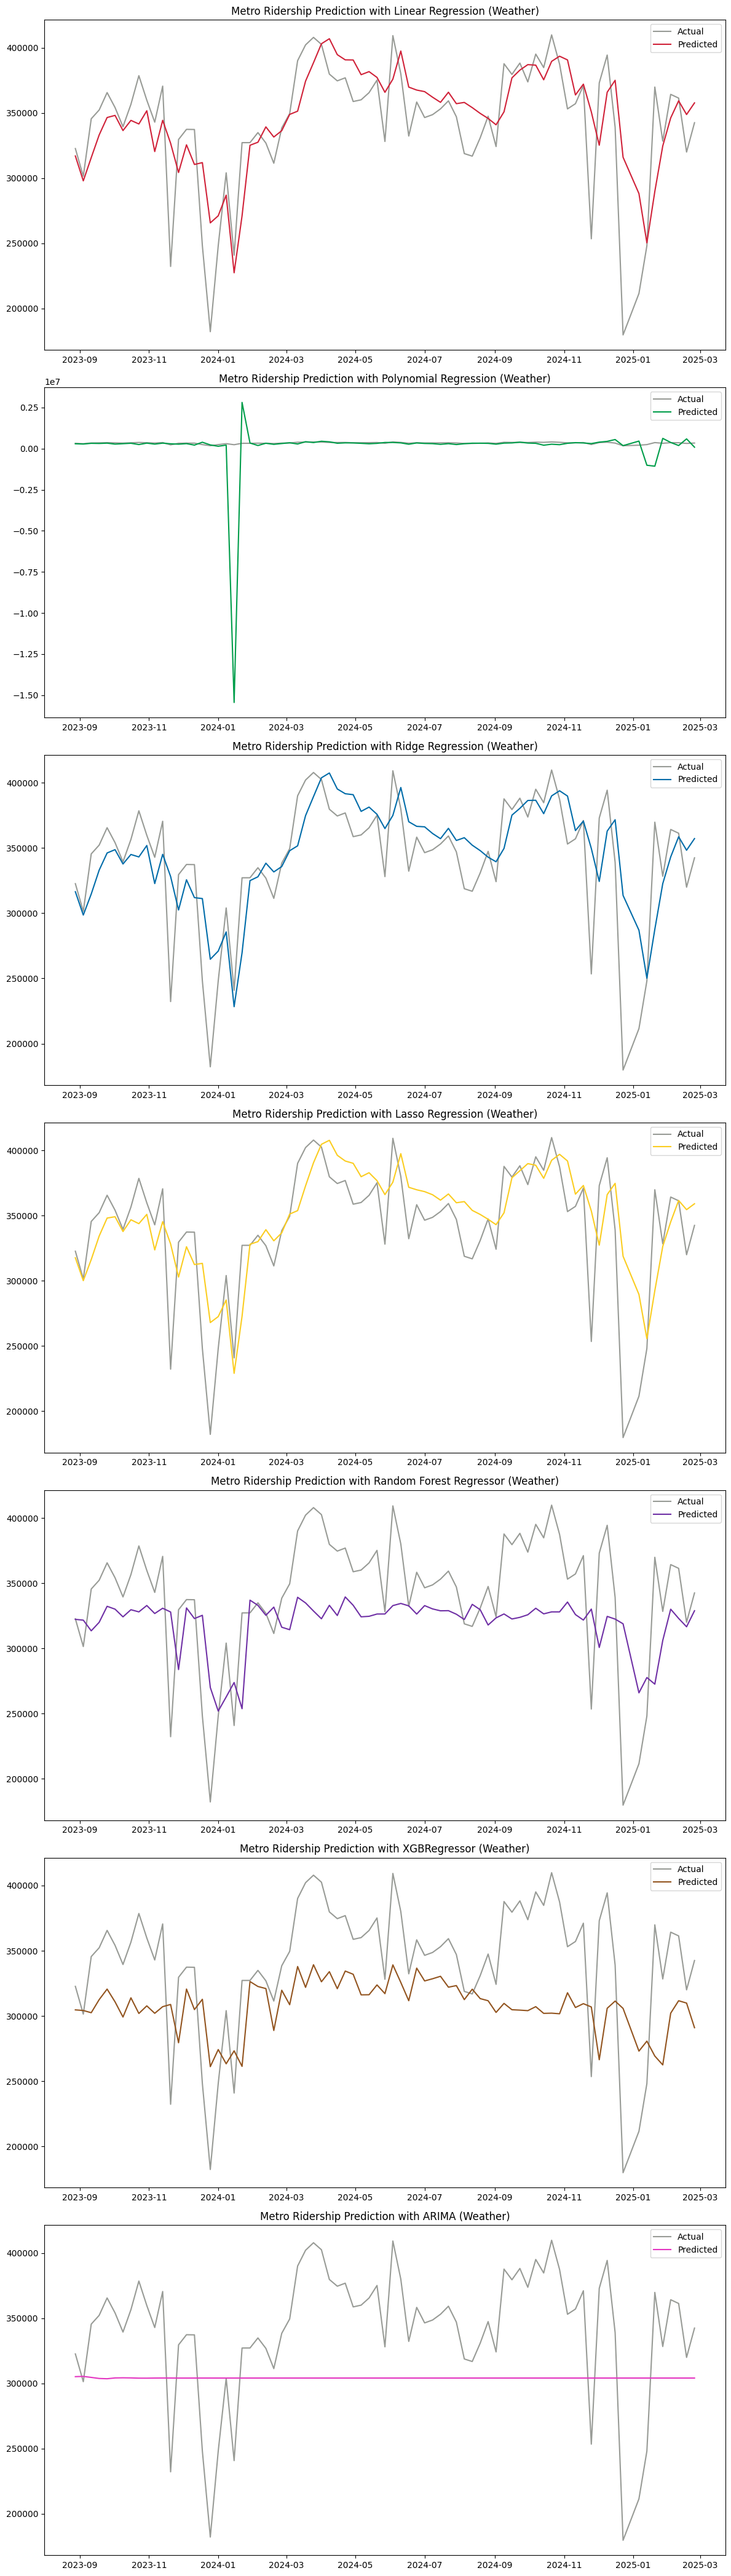

In [ ]:
# Adjust figsize
fig, axes = plt.subplots(7, 1, figsize=(12, 42))

# Plot 1: Linear Regression with Weather
axes[0].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[0].plot(y_test.index, y_pred_weather, label="Predicted", color=Red)
axes[0].set_title("Metro Ridership Prediction with Linear Regression (Weather)")
axes[0].legend()

# Plot 2: Polynomial Regression with Weather
axes[1].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[1].plot(y_test.index, y_pred_poly_weather, label="Predicted", color=Green)
axes[1].set_title("Metro Ridership Prediction with Polynomial Regression (Weather)")
axes[1].legend()

# Plot 3: Ridge Regression with Weather
axes[2].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[2].plot(y_test.index, y_pred_ridge_weather, label="Predicted", color=Blue)
axes[2].set_title("Metro Ridership Prediction with Ridge Regression (Weather)")
axes[2].legend()

# Plot 4: Lasso Regression with Weather
axes[3].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[3].plot(y_test.index, y_pred_lasso_weather, label="Predicted", color=Yellow)
axes[3].set_title("Metro Ridership Prediction with Lasso Regression (Weather)")
axes[3].legend()

# Plot 5: Random Forest Regressor with Weather
axes[4].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[4].plot(y_test.index, y_pred_rf_weather, label="Predicted", color=Purple)
axes[4].set_title("Metro Ridership Prediction with Random Forest Regressor (Weather)")
axes[4].legend()

# Plot 6: XGBRegressor with Weather
axes[5].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[5].plot(y_test.index, y_pred_xgb_weather, label="Predicted", color=Brown)
axes[5].set_title("Metro Ridership Prediction with XGBRegressor (Weather)")
axes[5].legend()

# Plot 7: ARIMA with Weather
axes[6].plot(y_test.index, y_test, label="Actual", color=Silver)
axes[6].plot(y_test.index, y_pred_arima, label="Predicted", color=Pink)
axes[6].set_title("Metro Ridership Prediction with ARIMA (Weather)")
axes[6].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Separate X, Y
features = ['Year','Week','Count_of_Holidays','Avg_Last_Week','Avg_Last_Month']
target = 'Avg_Week_Entries'
X = weekly_data[features]
y = weekly_data[target]

# Train-test split (70% train, 30% test)
train_size = int(len(weekly_data) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the model
lr_week_model = LinearRegression()
lr_week_model.fit(X_train, y_train)

# Make predictions
y_pred_week = lr_week_model.predict(X_test)

# Evaluation
mae_lr_week = mean_absolute_error(y_test, y_pred_week)
mse_lr_week = mean_squared_error(y_test, y_pred_week)
rmse_lr_week = np.sqrt(mse_lr_week)
r_squared_lr = r2_score(y_test, y_pred_week)

print(f"Mean Absolute Error (MAE): {mae_lr_week:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr_week:.2f}")
print(f"R-squared (R^2): {r_squared_lr:.2f}")

# Plot actual vs predicted ridership
# plt.figure(figsize=(12, 6))
# plt.plot(y_test.index, y_test, label="Actual Ridership", color=Silver)
# plt.plot(y_test.index, y_pred_week, label="Predicted Ridership", color=Red)
# plt.xlabel("Date")
# plt.ylabel("Number of Riders")
# plt.title("Metro Ridership Prediction with Linear Regression")
# plt.legend()
# plt.show()

Mean Absolute Error (MAE): 23131.63
Root Mean Squared Error (RMSE): 33526.01
R-squared (R^2): 0.53


In [ ]:
# Define 2025 holidays
holiday = { # 2025 holidays
    '2025-01-01': 'New Year\'s Day',
    '2025-01-20': 'Martin Luther King, Jr. Day',
    '2025-02-17': 'Washington’s Birthday (Presidents’ Day)',
    '2025-05-26': 'Memorial Day',
    '2025-06-19': 'Juneteenth National Independence Day',
    '2025-07-04': 'Independence Day',
    '2025-09-01': 'Labor Day',
    '2025-10-13': 'Columbus Day (Indigenous Peoples’ Day)',
    '2025-11-11': 'Veterans Day',
    '2025-11-27': 'Thanksgiving Day',
    '2025-12-25': 'Christmas Day'}

# Prediction for 2025 & 2026

In [ ]:
# Create future dates from 2025-03 to 2026-12
future_dates = pd.date_range(start='2025-03-01', end='2025-12-31', freq='W')
future_df = pd.DataFrame(index=future_dates)
future_df['Year'] = future_df.index.year
future_df['Week'] = future_df.index.isocalendar().week
#future_df

In [ ]:
# Create a date range for the DataFrame index
date_range = pd.date_range(start='2025-03-01', end='2025-12-28')
df = pd.DataFrame(date_range).rename(columns={0: 'Date'})
# Extract year and week from the date
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
# Create the 'Holiday' column and map it to 'holiday'
df['Holiday'] = df['Date'].dt.strftime('%Y-%m-%d').map(holiday)
# Create the 'is_holiday' column (True/False)
df['is_holiday'] = df['Holiday'].notna()

df = df.set_index('Date')

In [ ]:
# Adjust the format of the holiday dataframe
holiday_df = df.groupby(['Year', 'Week'])['is_holiday'].sum().reset_index()
holiday_df = holiday_df.rename(columns={'is_holiday': 'Count_of_Holidays'})

holiday_df['Date'] = pd.to_datetime(holiday_df['Year'].astype(str) + '-' + holiday_df['Week'].astype(str) + '-1', format='%Y-%W-%w')
holiday_df = holiday_df.set_index('Date')

In [ ]:
# Merge the holiday data into 2025 date dataframe
future_df = pd.merge(future_df, holiday_df, on=['Year', 'Week'], how='left')
future_df['Year_Week'] = future_df['Year'].astype(str) + '-' + future_df['Week'].astype(str)

In [ ]:
# Adjust the column as we needed
def to_datetime(x):
  return datetime.datetime.strptime(x + '-1', "%Y-%W-%w")

future_df['Year_Week'] = future_df['Year_Week'].apply(to_datetime)
future_df = future_df.set_index('Year_Week')
#future_df

In [ ]:
# Concatenate weekly data and 2025 date
predict_df = pd.concat([weekly_data, future_df])
predict_df

Year  Week  Avg_Week_Entries  Count_of_Holidays  Avg_Last_Week  \
Year_Week                                                                    
2020-04-06  2020    14      31194.600000                  0   31194.600000   
2020-04-13  2020    15      29669.857143                  0   31194.600000   
2020-04-20  2020    16      28204.571429                  0   29669.857143   
2020-04-27  2020    17      28558.428571                  0   28204.571429   
2020-05-04  2020    18      29905.857143                  0   28558.428571   
...          ...   ...               ...                ...            ...   
2025-12-01  2025    48               NaN                  1            NaN   
2025-12-08  2025    49               NaN                  0            NaN   
2025-12-15  2025    50               NaN                  0            NaN   
2025-12-22  2025    51               NaN                  0            NaN   
2025-12-29  2025    52               NaN                  1            NaN   

            Avg_Last_Month  
Year_Week                   
2020-04-06        31194.60  
2020-04-13        30432.23  
2020-04-20        29689.68  
2020-04-27        29406.86  
2020-05-04        29506.66  
...                    ...  
2025-12-01             NaN  
2025-12-08             NaN  
2025-12-15             NaN  
2025-12-22             NaN  
2025-12-29             NaN  

[301 rows x 6 columns]

In [ ]:
# Set the predict data
predict_df.reset_index(inplace=True)
predict_df = predict_df.drop(columns=['index'])

predict_df.loc[257, 'Avg_Last_Week'] = predict_df.loc[256,'Avg_Week_Entries']
predict_df['Avg_Last_Month'] = predict_df['Avg_Week_Entries'].rolling(window=5, min_periods=1).mean().round(2)

features = ['Year','Week','Count_of_Holidays','Avg_Last_Week','Avg_Last_Month']

predict_df.iloc[254:262]

Year_Week  Year  Week  Avg_Week_Entries  Count_of_Holidays  \
254 2025-02-10  2025     6     361395.428571                  0   
255 2025-02-17  2025     7     320020.142857                  0   
256 2025-02-24  2025     8     342521.428571                  1   
257 2025-03-03  2025     9               NaN                  0   
258 2025-03-10  2025    10               NaN                  0   
259 2025-03-17  2025    11               NaN                  0   
260 2025-03-24  2025    12               NaN                  0   
261 2025-03-31  2025    13               NaN                  0   

     Avg_Last_Week  Avg_Last_Month  
254  364263.714286       334405.91  
255  361395.428571       348784.89  
256  320020.142857       343317.46  
257  342521.428571       347050.18  
258            NaN       341312.33  
259            NaN       331270.79  
260            NaN       342521.43  
261            NaN             NaN

In [ ]:
y_pred_week = lr_week_model.predict(predict_df.loc[[257],features ])
print(predict_df.loc[257,['Year','Week','Count_of_Holidays','Avg_Last_Week','Avg_Last_Month'] ])
print(X_test.iloc[0])
print(y_pred_week)

Year                          2025
Week                             9
Count_of_Holidays                0
Avg_Last_Week        342521.428571
Avg_Last_Month           347050.18
Name: 257, dtype: object
Year                    2023.0
Week                      35.0
Count_of_Holidays          0.0
Avg_Last_Week         301273.0
Avg_Last_Month       312452.66
Name: 2023-08-28 00:00:00, dtype: Float64
[363206.64560816]


In [ ]:
predict_df.loc[257, 'Avg_Week_Entries'] = y_pred_week
predict_df.iloc[254:]

Year_Week  Year  Week  Avg_Week_Entries  Count_of_Holidays  \
254 2025-02-10  2025     6     361395.428571                  0   
255 2025-02-17  2025     7     320020.142857                  0   
256 2025-02-24  2025     8     342521.428571                  1   
257 2025-03-03  2025     9     363206.645608                  0   
258 2025-03-10  2025    10               NaN                  0   
259 2025-03-17  2025    11               NaN                  0   
260 2025-03-24  2025    12               NaN                  0   
261 2025-03-31  2025    13               NaN                  0   
262 2025-04-07  2025    14               NaN                  0   
263 2025-04-14  2025    15               NaN                  0   
264 2025-04-21  2025    16               NaN                  0   
265 2025-04-28  2025    17               NaN                  0   
266 2025-05-05  2025    18               NaN                  0   
267 2025-05-12  2025    19               NaN                  0   
268 2025-05-19  2025    20               NaN                  0   
269 2025-05-26  2025    21               NaN                  0   
270 2025-06-02  2025    22               NaN                  1   
271 2025-06-09  2025    23               NaN                  0   
272 2025-06-16  2025    24               NaN                  0   
273 2025-06-23  2025    25               NaN                  1   
274 2025-06-30  2025    26               NaN                  0   
275 2025-07-07  2025    27               NaN                  1   
276 2025-07-14  2025    28               NaN                  0   
277 2025-07-21  2025    29               NaN                  0   
278 2025-07-28  2025    30               NaN                  0   
279 2025-08-04  2025    31               NaN                  0   
280 2025-08-11  2025    32               NaN                  0   
281 2025-08-18  2025    33               NaN                  0   
282 2025-08-25  2025    34               NaN                  0   
283 2025-09-01  2025    35               NaN                  0   
284 2025-09-08  2025    36               NaN                  1   
285 2025-09-15  2025    37               NaN                  0   
286 2025-09-22  2025    38               NaN                  0   
287 2025-09-29  2025    39               NaN                  0   
288 2025-10-06  2025    40               NaN                  0   
289 2025-10-13  2025    41               NaN                  0   
290 2025-10-20  2025    42               NaN                  1   
291 2025-10-27  2025    43               NaN                  0   
292 2025-11-03  2025    44               NaN                  0   
293 2025-11-10  2025    45               NaN                  0   
294 2025-11-17  2025    46               NaN                  1   
295 2025-11-24  2025    47               NaN                  0   
296 2025-12-01  2025    48               NaN                  1   
297 2025-12-08  2025    49               NaN                  0   
298 2025-12-15  2025    50               NaN                  0   
299 2025-12-22  2025    51               NaN                  0   
300 2025-12-29  2025    52               NaN                  1   

     Avg_Last_Week  Avg_Last_Month  
254  364263.714286       334405.91  
255  361395.428571       348784.89  
256  320020.142857       343317.46  
257  342521.428571       347050.18  
258            NaN       341312.33  
259            NaN       331270.79  
260            NaN       342521.43  
261            NaN             NaN  
262            NaN             NaN  
263            NaN             NaN  
264            NaN             NaN  
265            NaN             NaN  
266            NaN             NaN  
267            NaN             NaN  
268            NaN             NaN  
269            NaN             NaN  
270            NaN             NaN  
271            NaN             NaN  
272            NaN             NaN  
273            NaN             NaN  
274        

In [ ]:
for i in range(257, len(predict_df)):
  predict_df.loc[i, 'Avg_Last_Week'] = predict_df.loc[i-1,'Avg_Week_Entries']
  predict_df['Avg_Last_Month'] = predict_df['Avg_Week_Entries'].rolling(window=5, min_periods=1).mean().round(2)
  y_pred_week = lr_week_model.predict(predict_df.loc[[i],features ])
  predict_df.loc[i, 'Avg_Week_Entries'] = y_pred_week[0] # Access the first element of the prediction array

In [ ]:
predict_df

Year_Week  Year  Week  Avg_Week_Entries  Count_of_Holidays  \
0   2020-04-06  2020    14      31194.600000                  0   
1   2020-04-13  2020    15      29669.857143                  0   
2   2020-04-20  2020    16      28204.571429                  0   
3   2020-04-27  2020    17      28558.428571                  0   
4   2020-05-04  2020    18      29905.857143                  0   
..         ...   ...   ...               ...                ...   
296 2025-12-01  2025    48     440309.222320                  1   
297 2025-12-08  2025    49     445715.341461                  0   
298 2025-12-15  2025    50     445016.022919                  0   
299 2025-12-22  2025    51     444709.294155                  0   
300 2025-12-29  2025    52     432012.517322                  1   

     Avg_Last_Week  Avg_Last_Month  
0     31194.600000        31194.60  
1     31194.600000        30432.23  
2     29669.857143        29689.68  
3     28204.571429        29406.86  
4     28558.428571        29506.66  
..             ...             ...  
296  450856.811570       449532.39  
297  440309.222320       447387.79  
298  445715.341461       445166.10  
299  445016.022919       445321.34  
300  444709.294155       443937.47  

[301 rows x 7 columns]

# Split predict_df and plot

In [ ]:
# split the predict_df into 2 dataframe, separate by 2025-03-01
predict_df['Year_Week'] = pd.to_datetime(predict_df['Year_Week'])

# Split the DataFrame
df_actual = predict_df[predict_df['Year_Week'] < pd.to_datetime('2025-03-01')]
df_prediction = predict_df[predict_df['Year_Week'] >= pd.to_datetime('2025-03-01')]

In [ ]:
df_prediction.head()

Year_Week  Year  Week  Avg_Week_Entries  Count_of_Holidays  \
Date                                                                     
2025-03-03 2025-03-03  2025     9     365435.843944                  0   
2025-03-10 2025-03-10  2025    10     369062.703957                  0   
2025-03-17 2025-03-17  2025    11     371017.819013                  0   
2025-03-24 2025-03-24  2025    12     380010.906558                  0   
2025-03-31 2025-03-31  2025    13     388506.446180                  0   

            Avg_Last_Week  Avg_Last_Month  
Date                                       
2025-03-03  342521.428571       350727.31  
2025-03-10  365435.843944       351687.11  
2025-03-17  369062.703957       353611.59  
2025-03-24  371017.819013       365609.74  
2025-03-31  380010.906558       374806.74

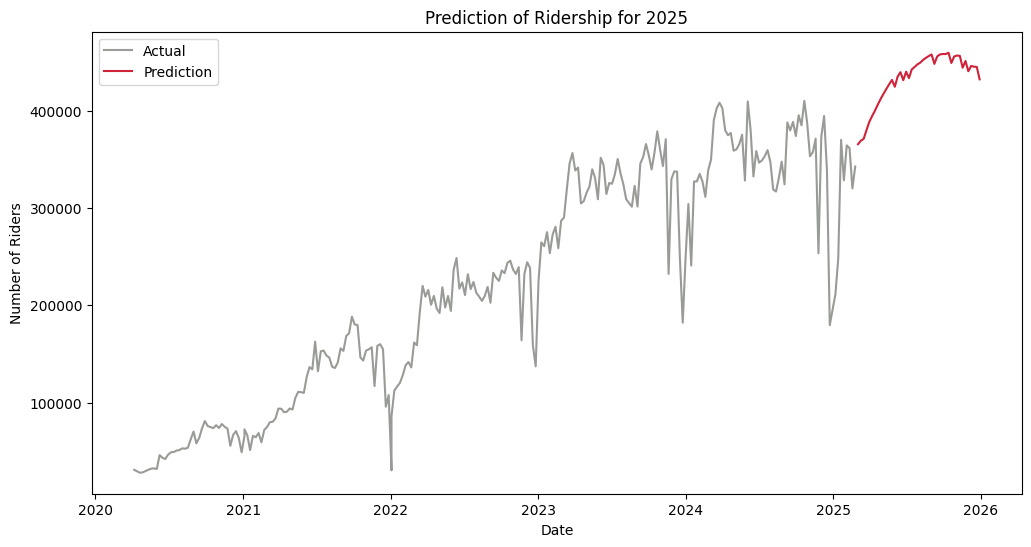

In [ ]:
# Plot the prediction outcome
plt.figure(figsize=(12, 6))
plt.plot(df_actual['Year_Week'], df_actual['Avg_Week_Entries'], label="Actual", color=Silver)
plt.plot(df_prediction['Year_Week'], df_prediction['Avg_Week_Entries'], label="Prediction", color=Red)
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.title("Prediction of Ridership for 2025")
plt.legend()
plt.show()